In [1]:
# Numerical and plotting packages
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import natsort
from scipy.signal import sosfiltfilt, butter, hilbert
# Libraries needed for this notebook to interact with the DANDI API
from pynwb import NWBHDF5IO
from dandi.dandiapi import DandiAPIClient
import pynwb

# Libraries needed for this notebook to interact with NWB events
from ndx_events import LabeledEvents, AnnotatedEventsTable, Events

# FSSpec is a library that allows us to read files from the cloud
import fsspec

# NWB is based on HF5, so we need this library to read NWB files
import h5py
from fsspec.implementations.cached import CachingFileSystem
import matplotlib
import os

# Extracting Corresponding Data

## Extract a dictionary of nwbfile for each subject

In [2]:
if not os.path.exists('Data'): # create Data directories
    os.mkdir('Data')

# Get a list of paths
with DandiAPIClient() as client:
    paths = []
    for file in client.get_dandiset("000055", "draft").get_assets_with_path_prefix(""):
        paths.append(file.path)
paths = natsort.natsorted(paths)
print(paths)

['sub-01/sub-01_ses-3_behavior+ecephys.nwb', 'sub-01/sub-01_ses-4_behavior+ecephys.nwb', 'sub-01/sub-01_ses-5_behavior+ecephys.nwb', 'sub-01/sub-01_ses-7_behavior+ecephys.nwb', 'sub-02/sub-02_ses-3_behavior+ecephys.nwb', 'sub-02/sub-02_ses-4_behavior+ecephys.nwb', 'sub-02/sub-02_ses-5_behavior+ecephys.nwb', 'sub-02/sub-02_ses-6_behavior+ecephys.nwb', 'sub-03/sub-03_ses-3_behavior+ecephys.nwb', 'sub-03/sub-03_ses-4_behavior+ecephys.nwb', 'sub-03/sub-03_ses-5_behavior+ecephys.nwb', 'sub-03/sub-03_ses-6_behavior+ecephys.nwb', 'sub-04/sub-04_ses-3_behavior+ecephys.nwb', 'sub-04/sub-04_ses-4_behavior+ecephys.nwb', 'sub-04/sub-04_ses-5_behavior+ecephys.nwb', 'sub-04/sub-04_ses-6_behavior+ecephys.nwb', 'sub-04/sub-04_ses-7_behavior+ecephys.nwb', 'sub-05/sub-05_ses-3_behavior+ecephys.nwb', 'sub-05/sub-05_ses-4_behavior+ecephys.nwb', 'sub-05/sub-05_ses-7_behavior+ecephys.nwb', 'sub-06/sub-06_ses-3_behavior+ecephys.nwb', 'sub-06/sub-06_ses-4_behavior+ecephys.nwb', 'sub-06/sub-06_ses-5_behavior+e

In [3]:
def extract_id_n_session(path):
    path = path.split('/')
    sub, file_name = path[0], path[1]
    sbj_id = sub[-2:]
    sbj_session = file_name.split('_')[1]
    return sbj_id, sbj_session[-1]

In [4]:
# select one session for each subject

sbj_2_session = {}

for item in paths:
    sbj_id, session = extract_id_n_session(item)

    if sbj_id not in sbj_2_session.keys():
        sbj_2_session[sbj_id] = session
    else:
        pass

# print(sbj_2_session)

In [5]:
# get files for all subject
from extract_utils import get_nwb
filedict = {}
for i, item in enumerate(sbj_2_session.keys()):
    sbj_id, sbj_session = item, sbj_2_session[item]
    filedict[sbj_id] = get_nwb(sbj_id, sbj_session)

/Applications/anaconda3/envs/NMA/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.4.0-alpha because version 1.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Applications/anaconda3/envs/NMA/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.5 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Applications/anaconda3/envs/NMA/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.4.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Applications/anaconda3/envs/NMA/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hd

# Plot electrode locations for all subject

In [6]:
if not os.path.exists('Data/electrodePos'):
    os.mkdir('Data/electrodePos')

/Users/apple/NWA/extract_utils.py:191: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/apple/NWA/extract_utils.py:191: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/apple/NWA/extract_utils.py:191: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/apple/NWA/extract_utils.py:191: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/apple/NWA/extract_utils.py:191: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/apple/NWA/extract_utils.py:191: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results mig

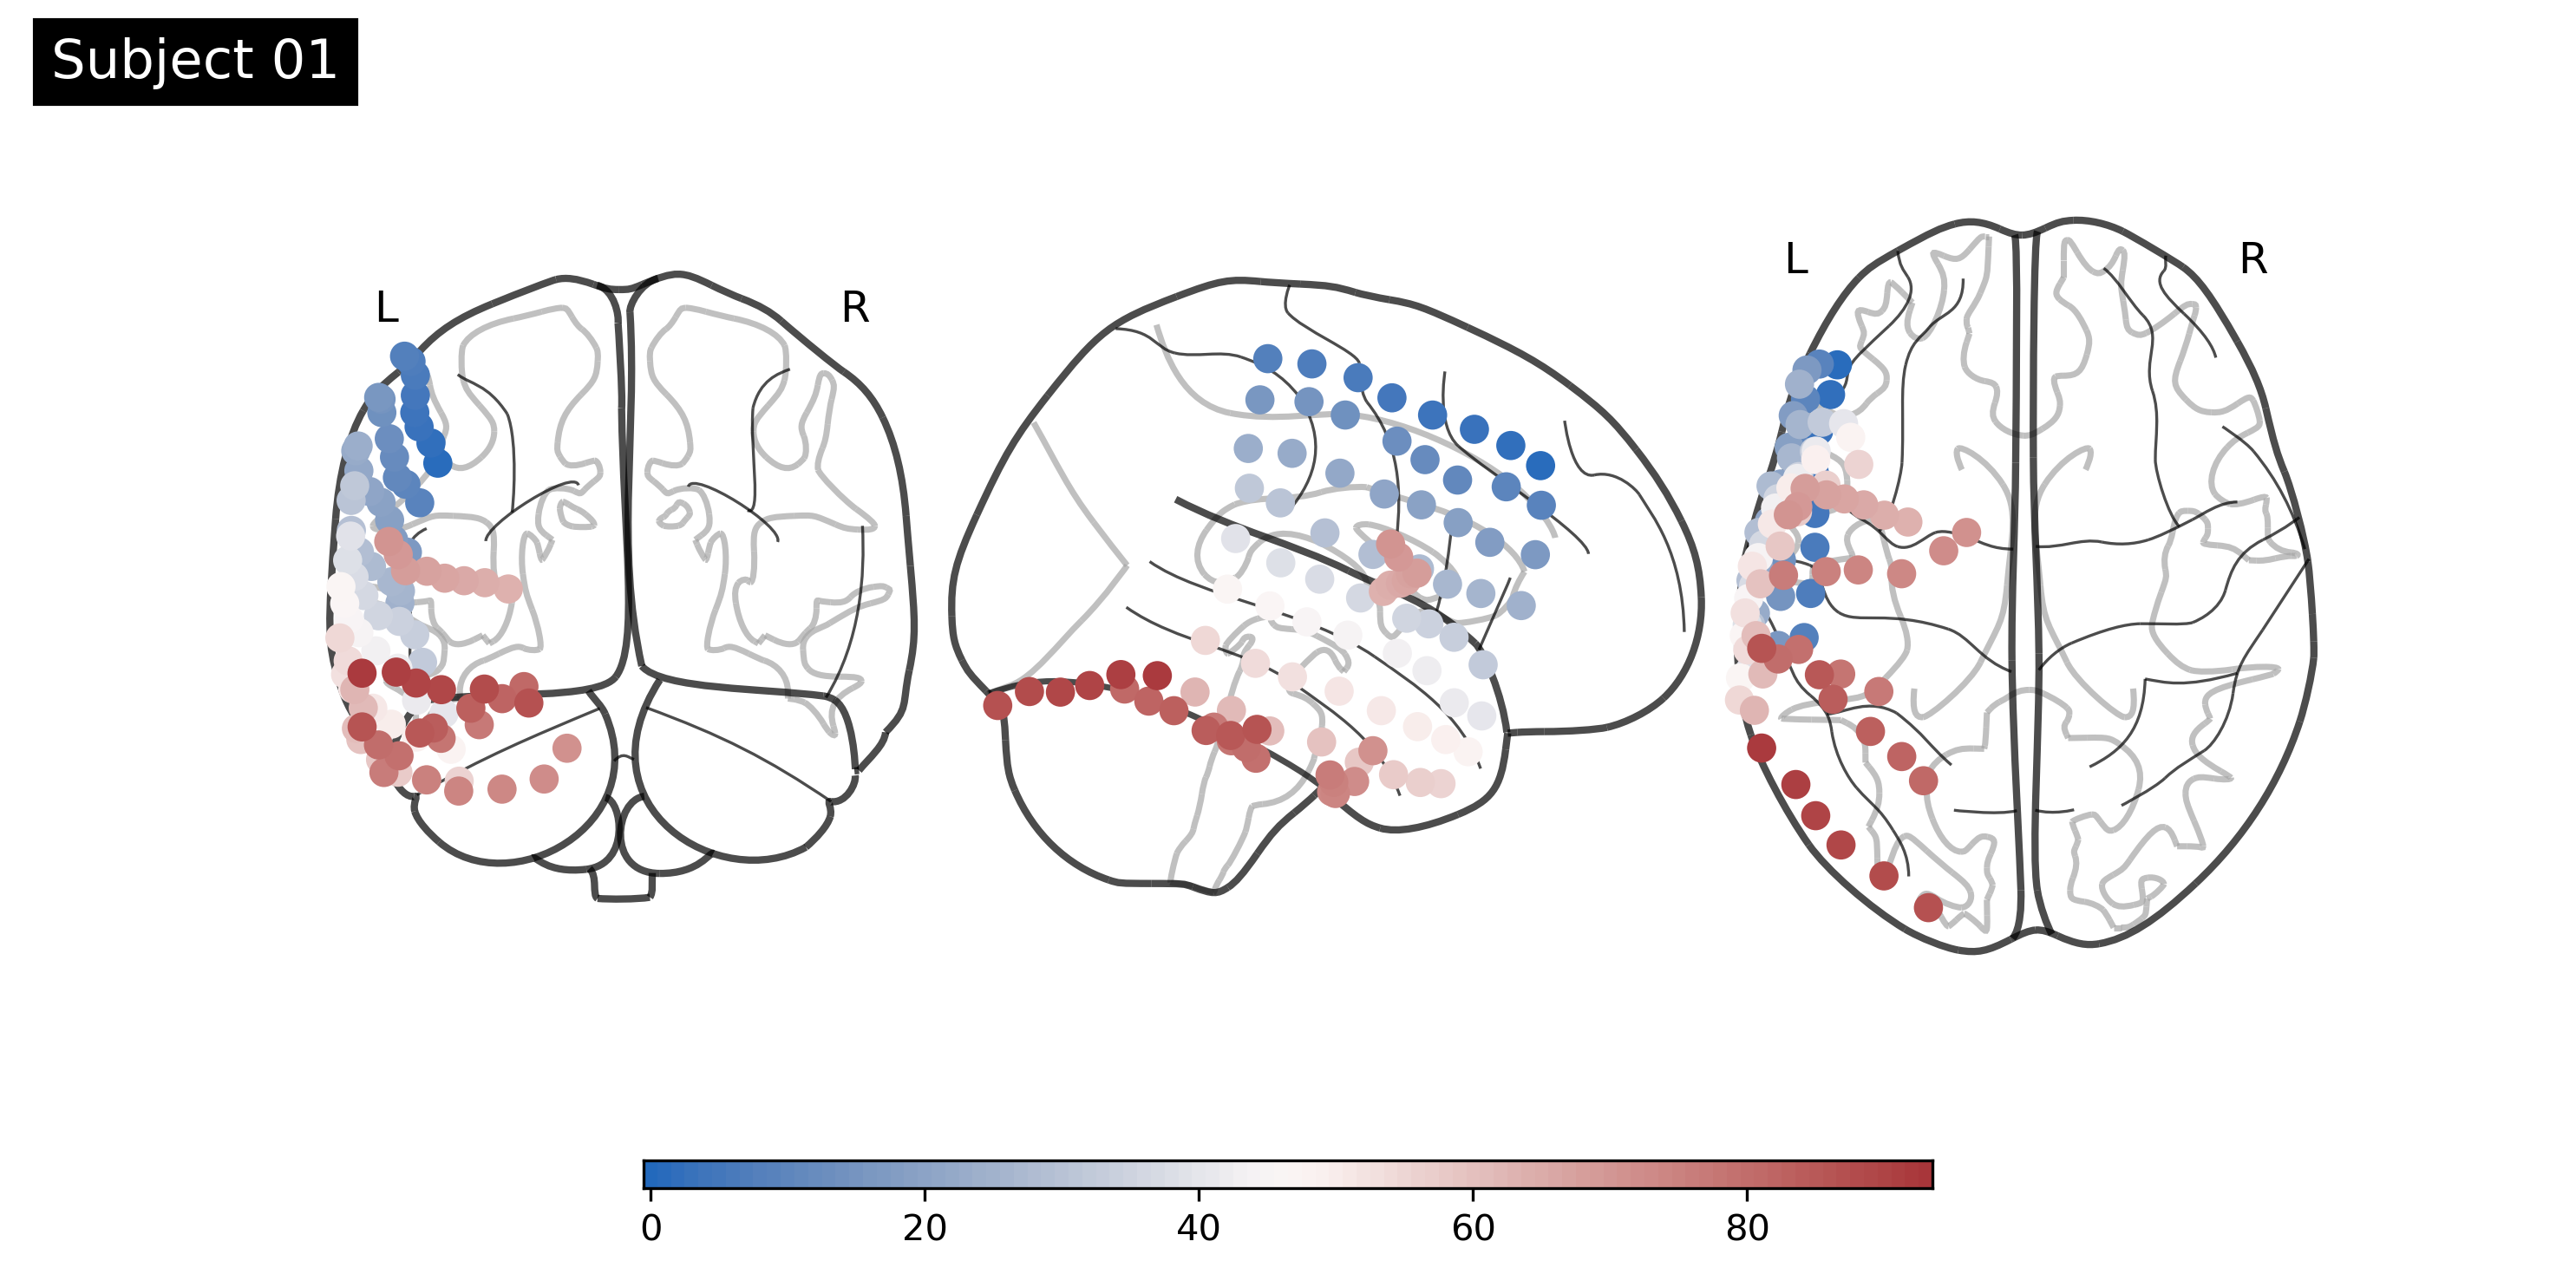

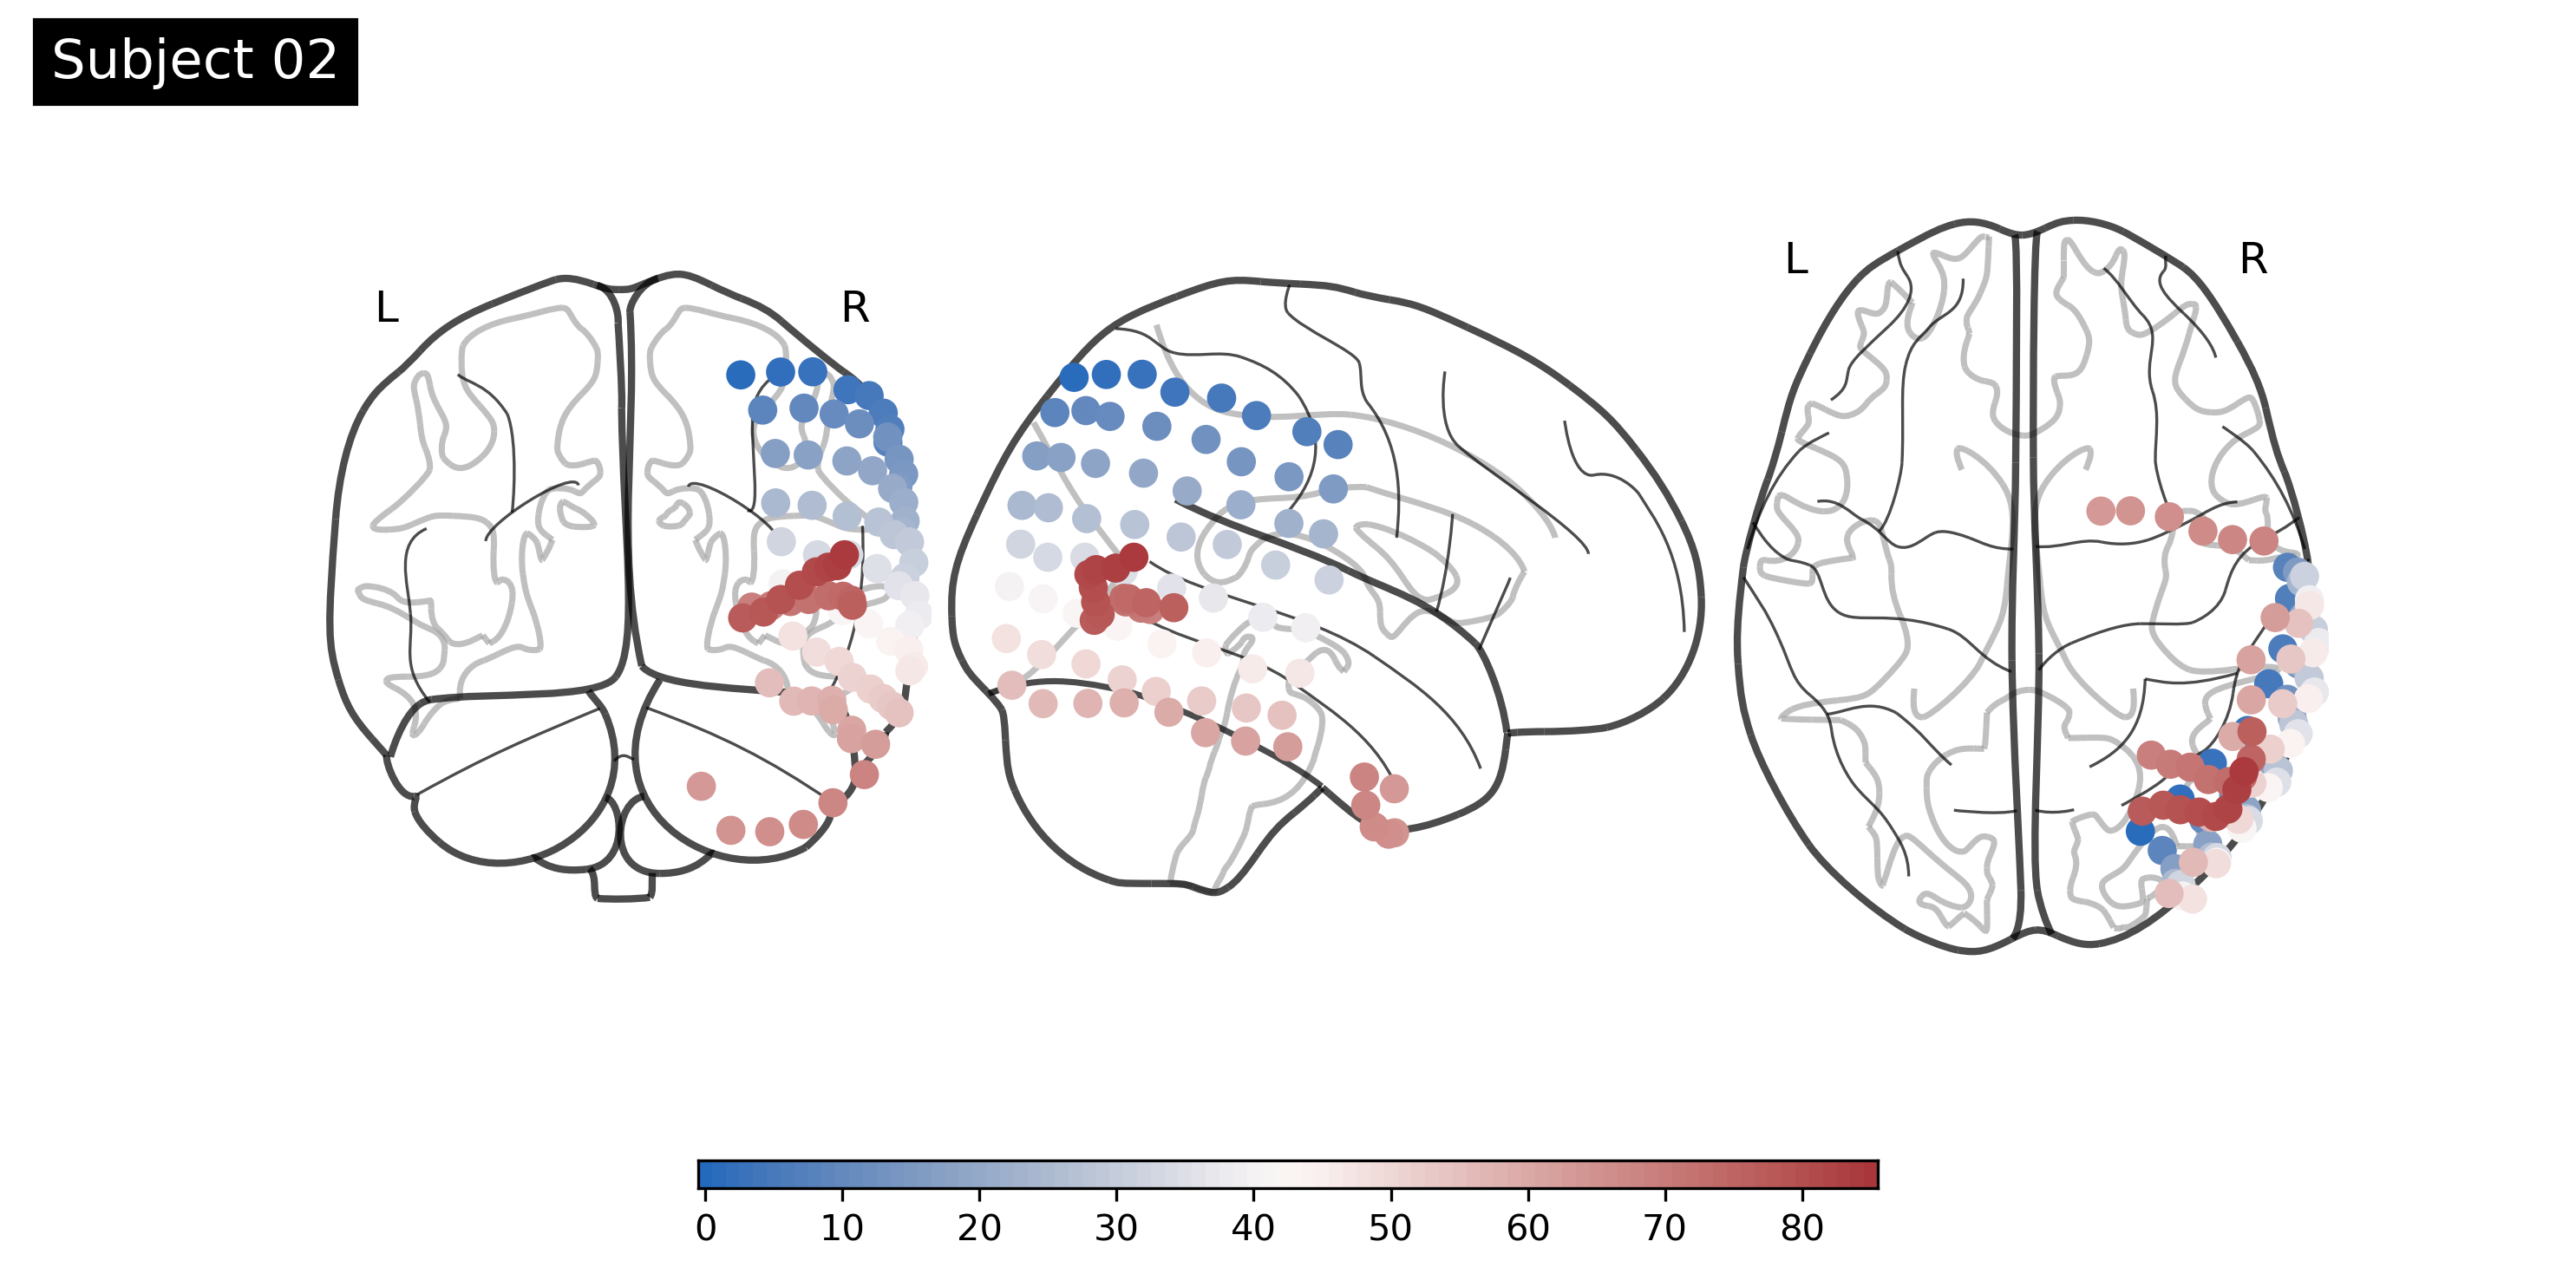

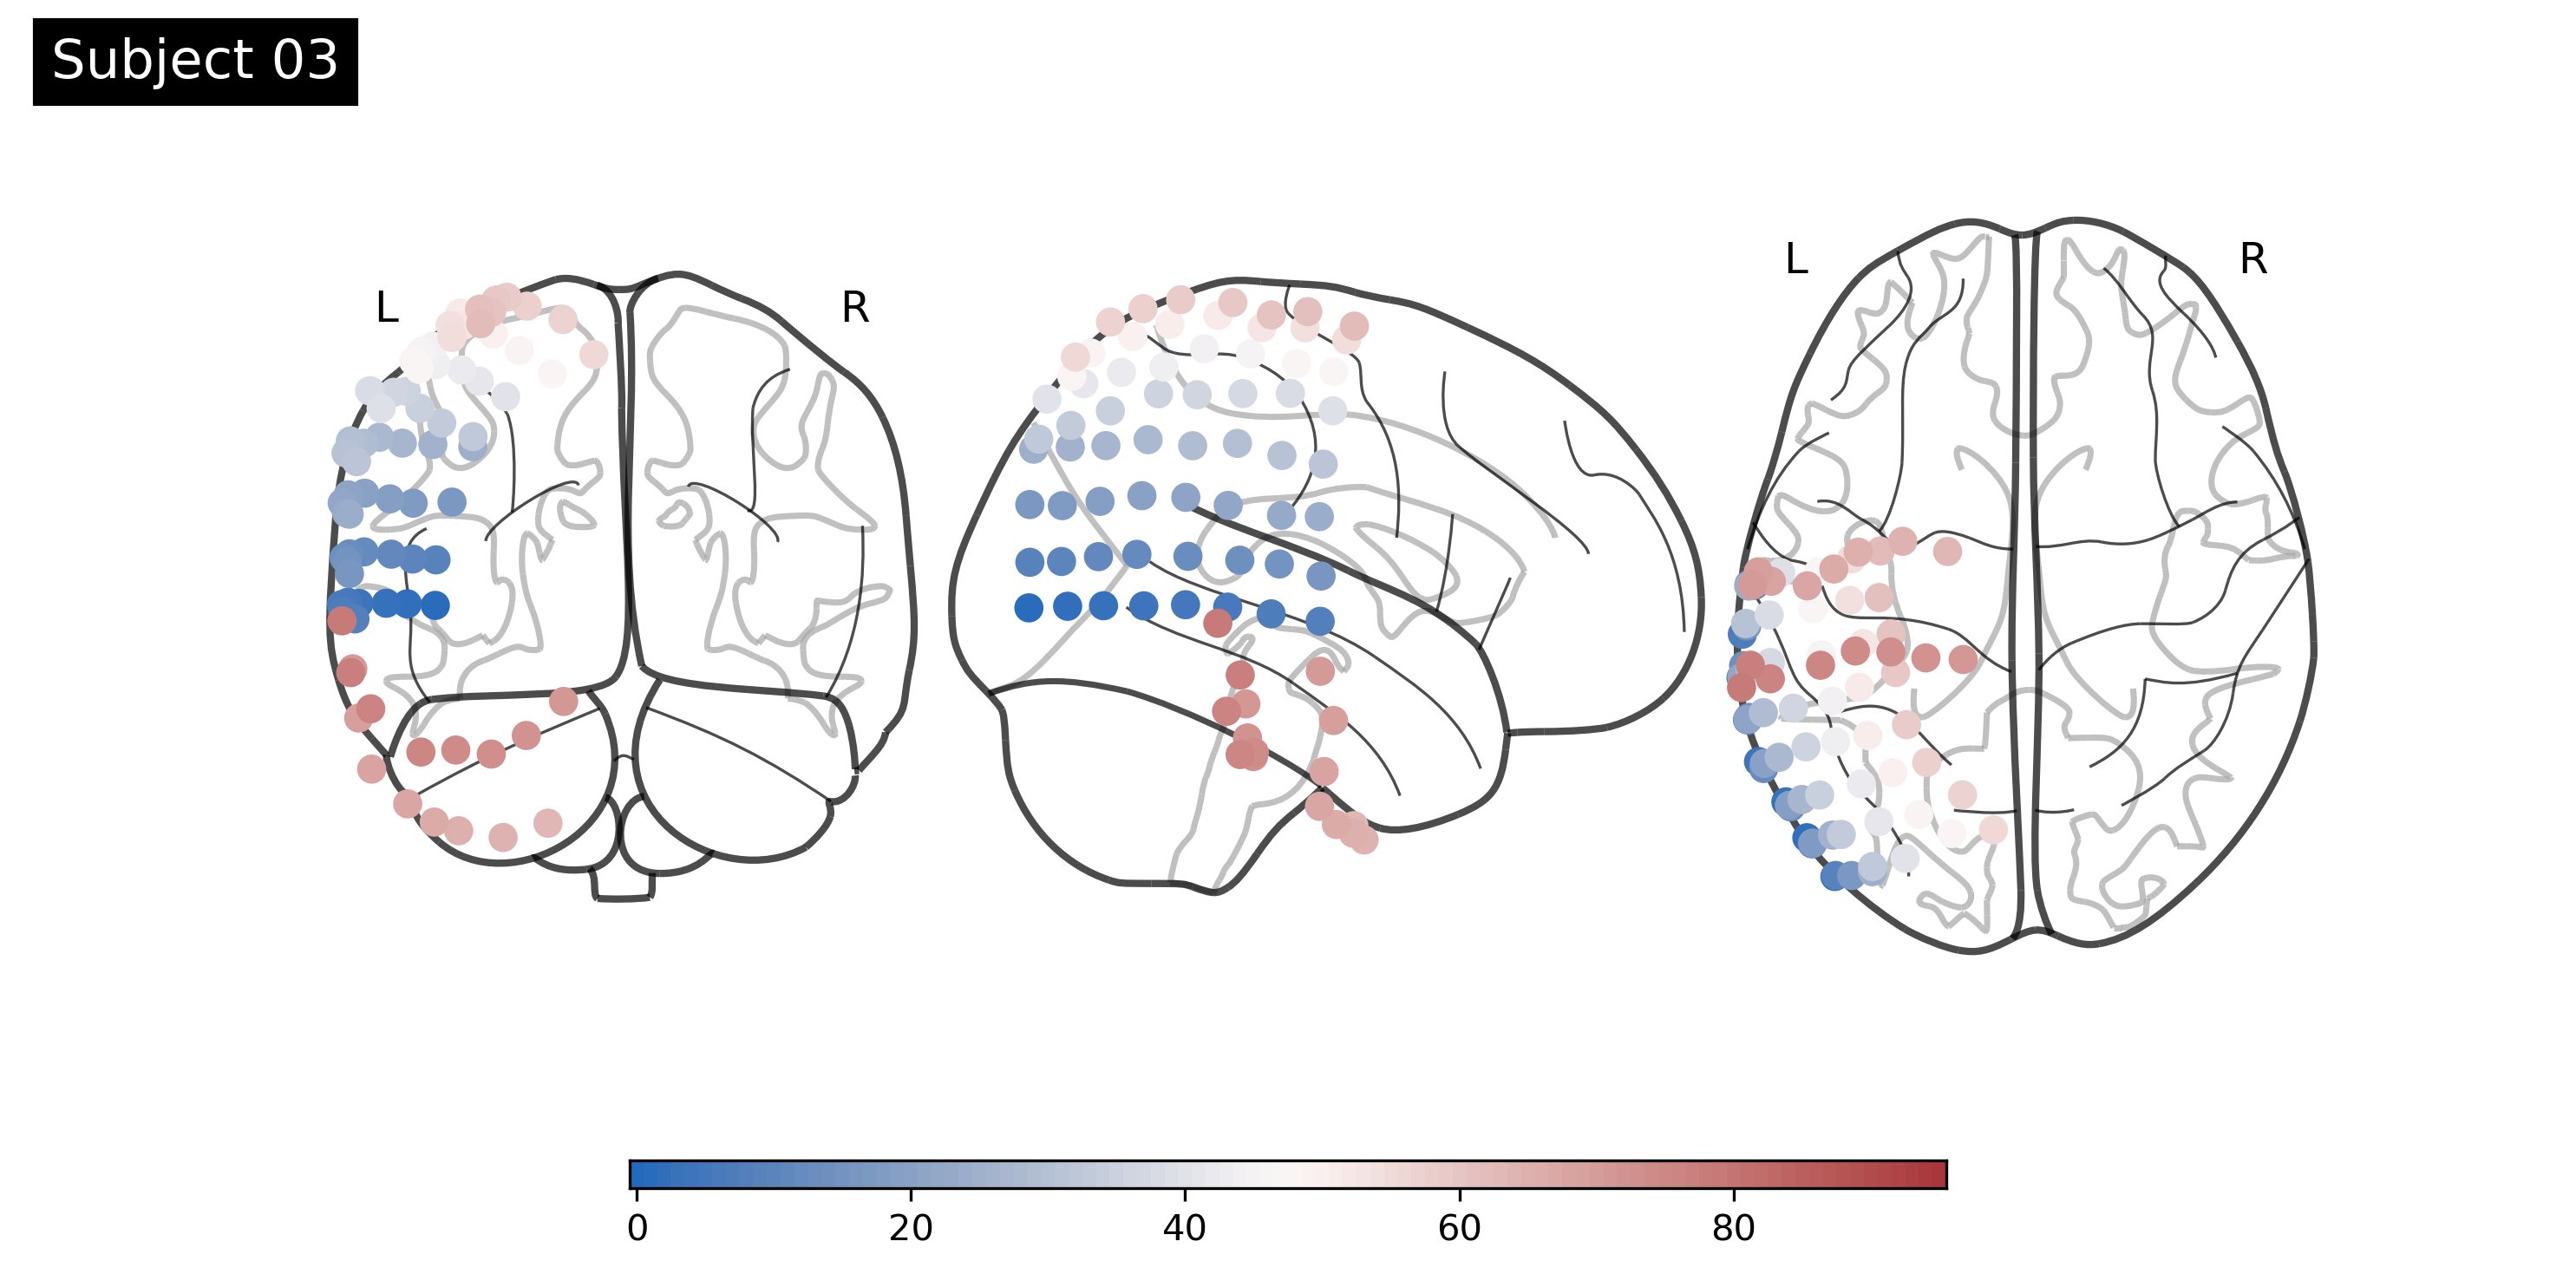

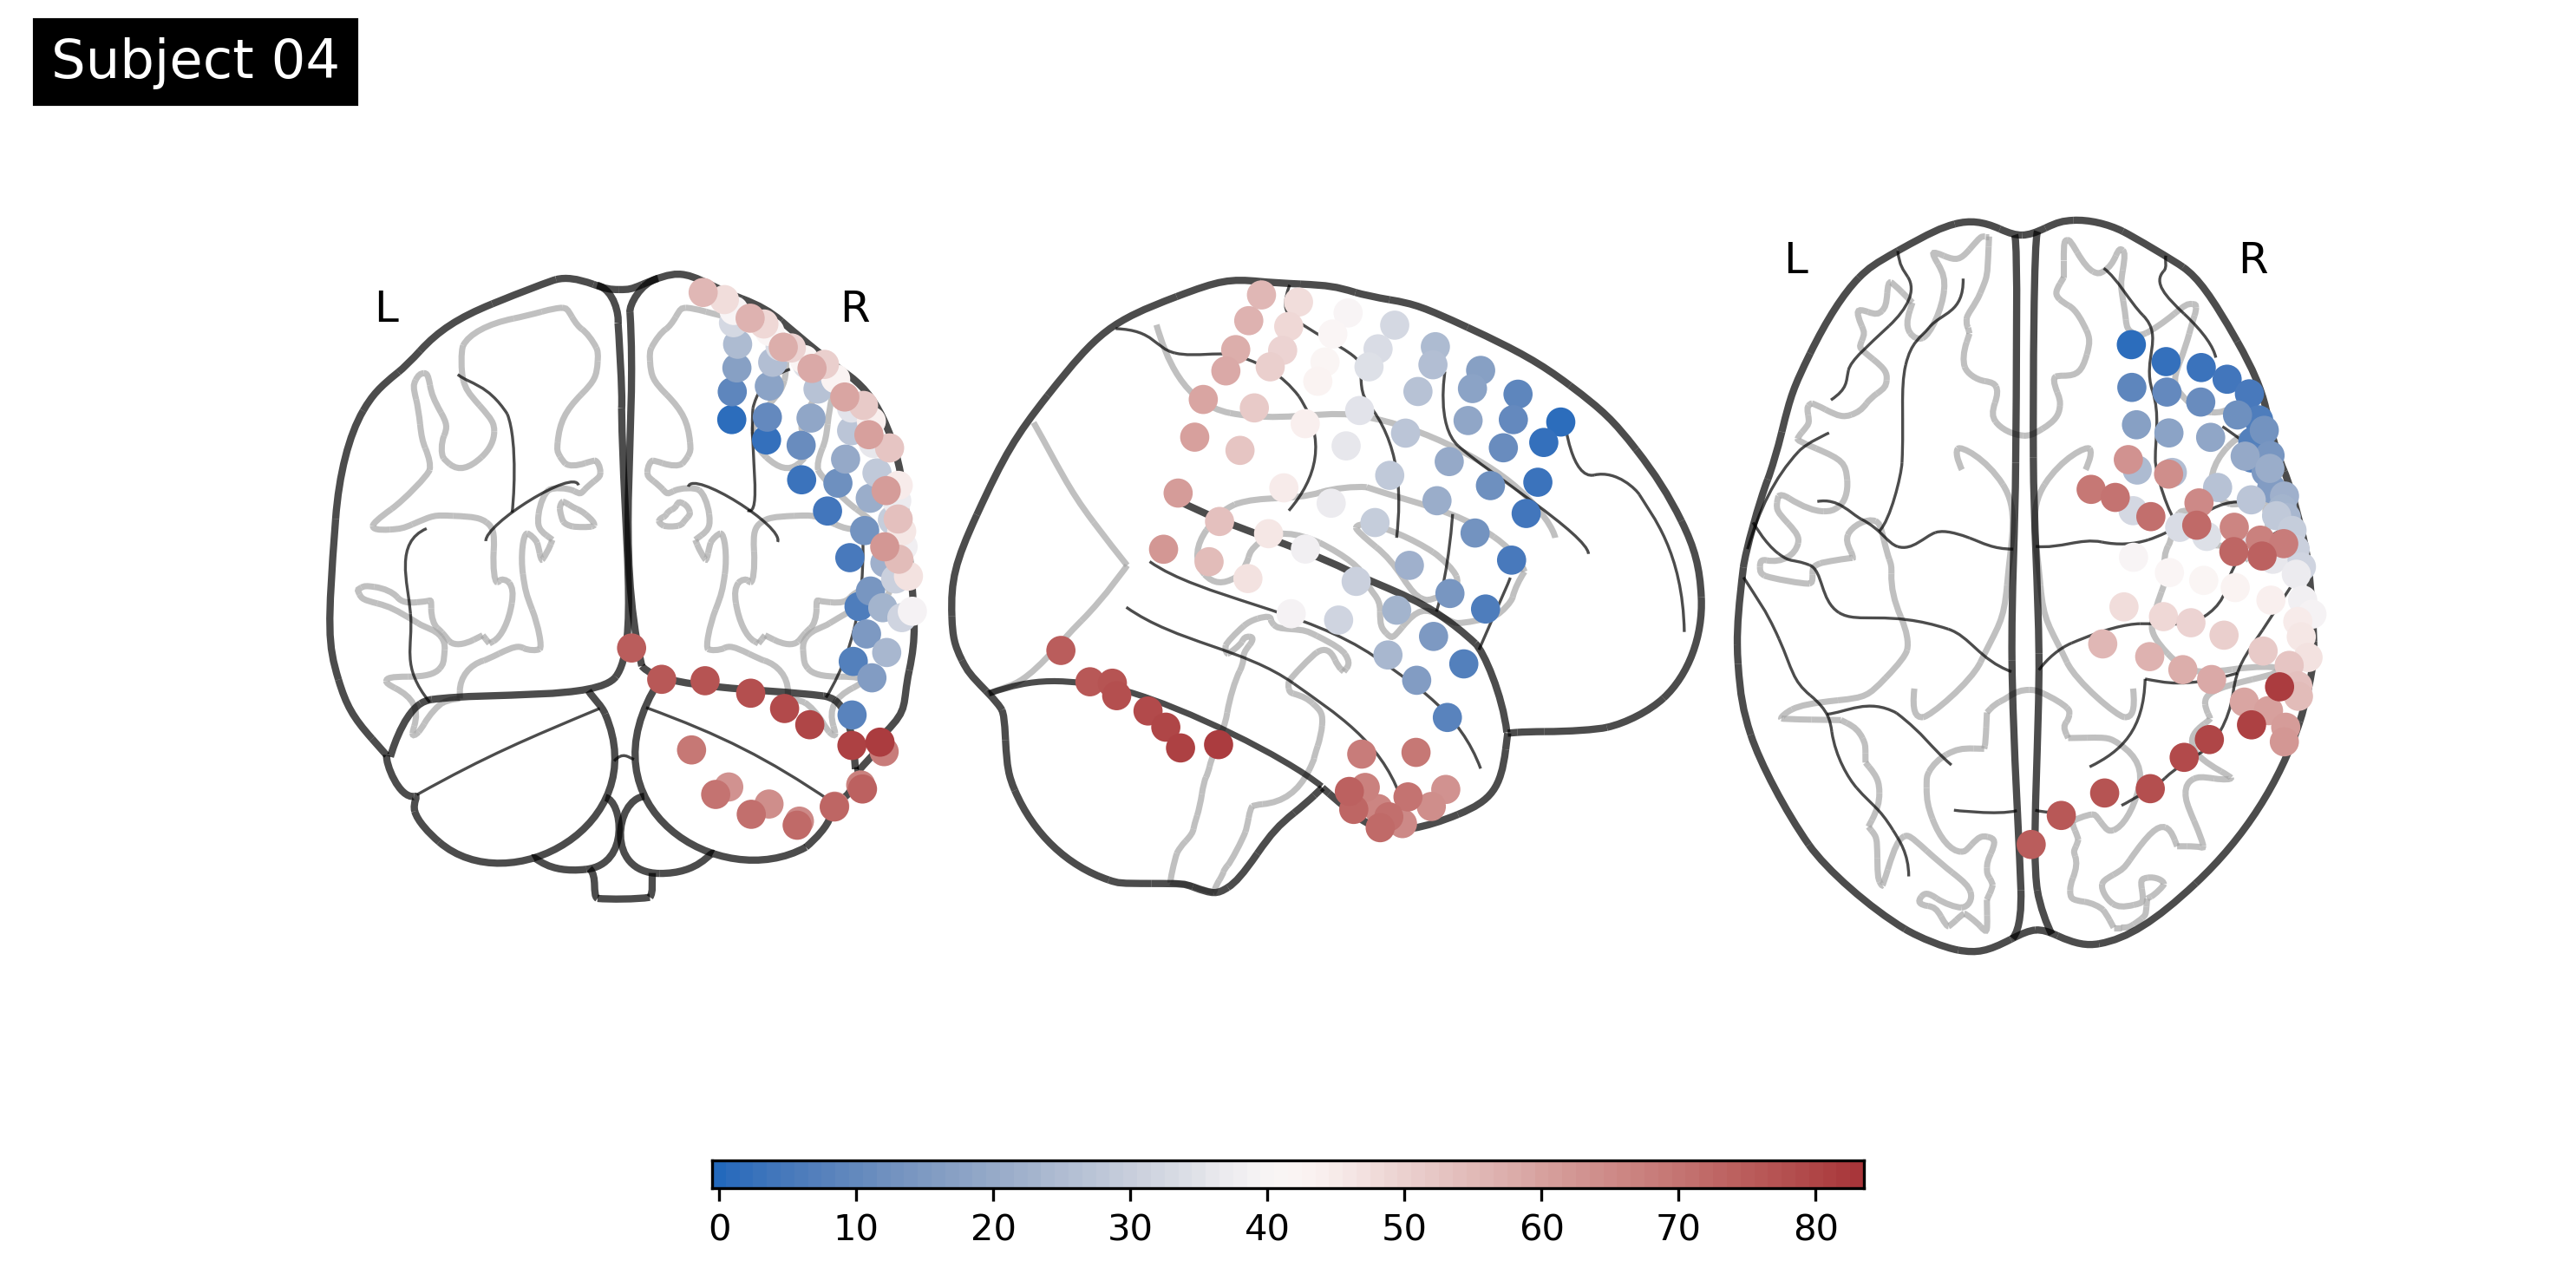

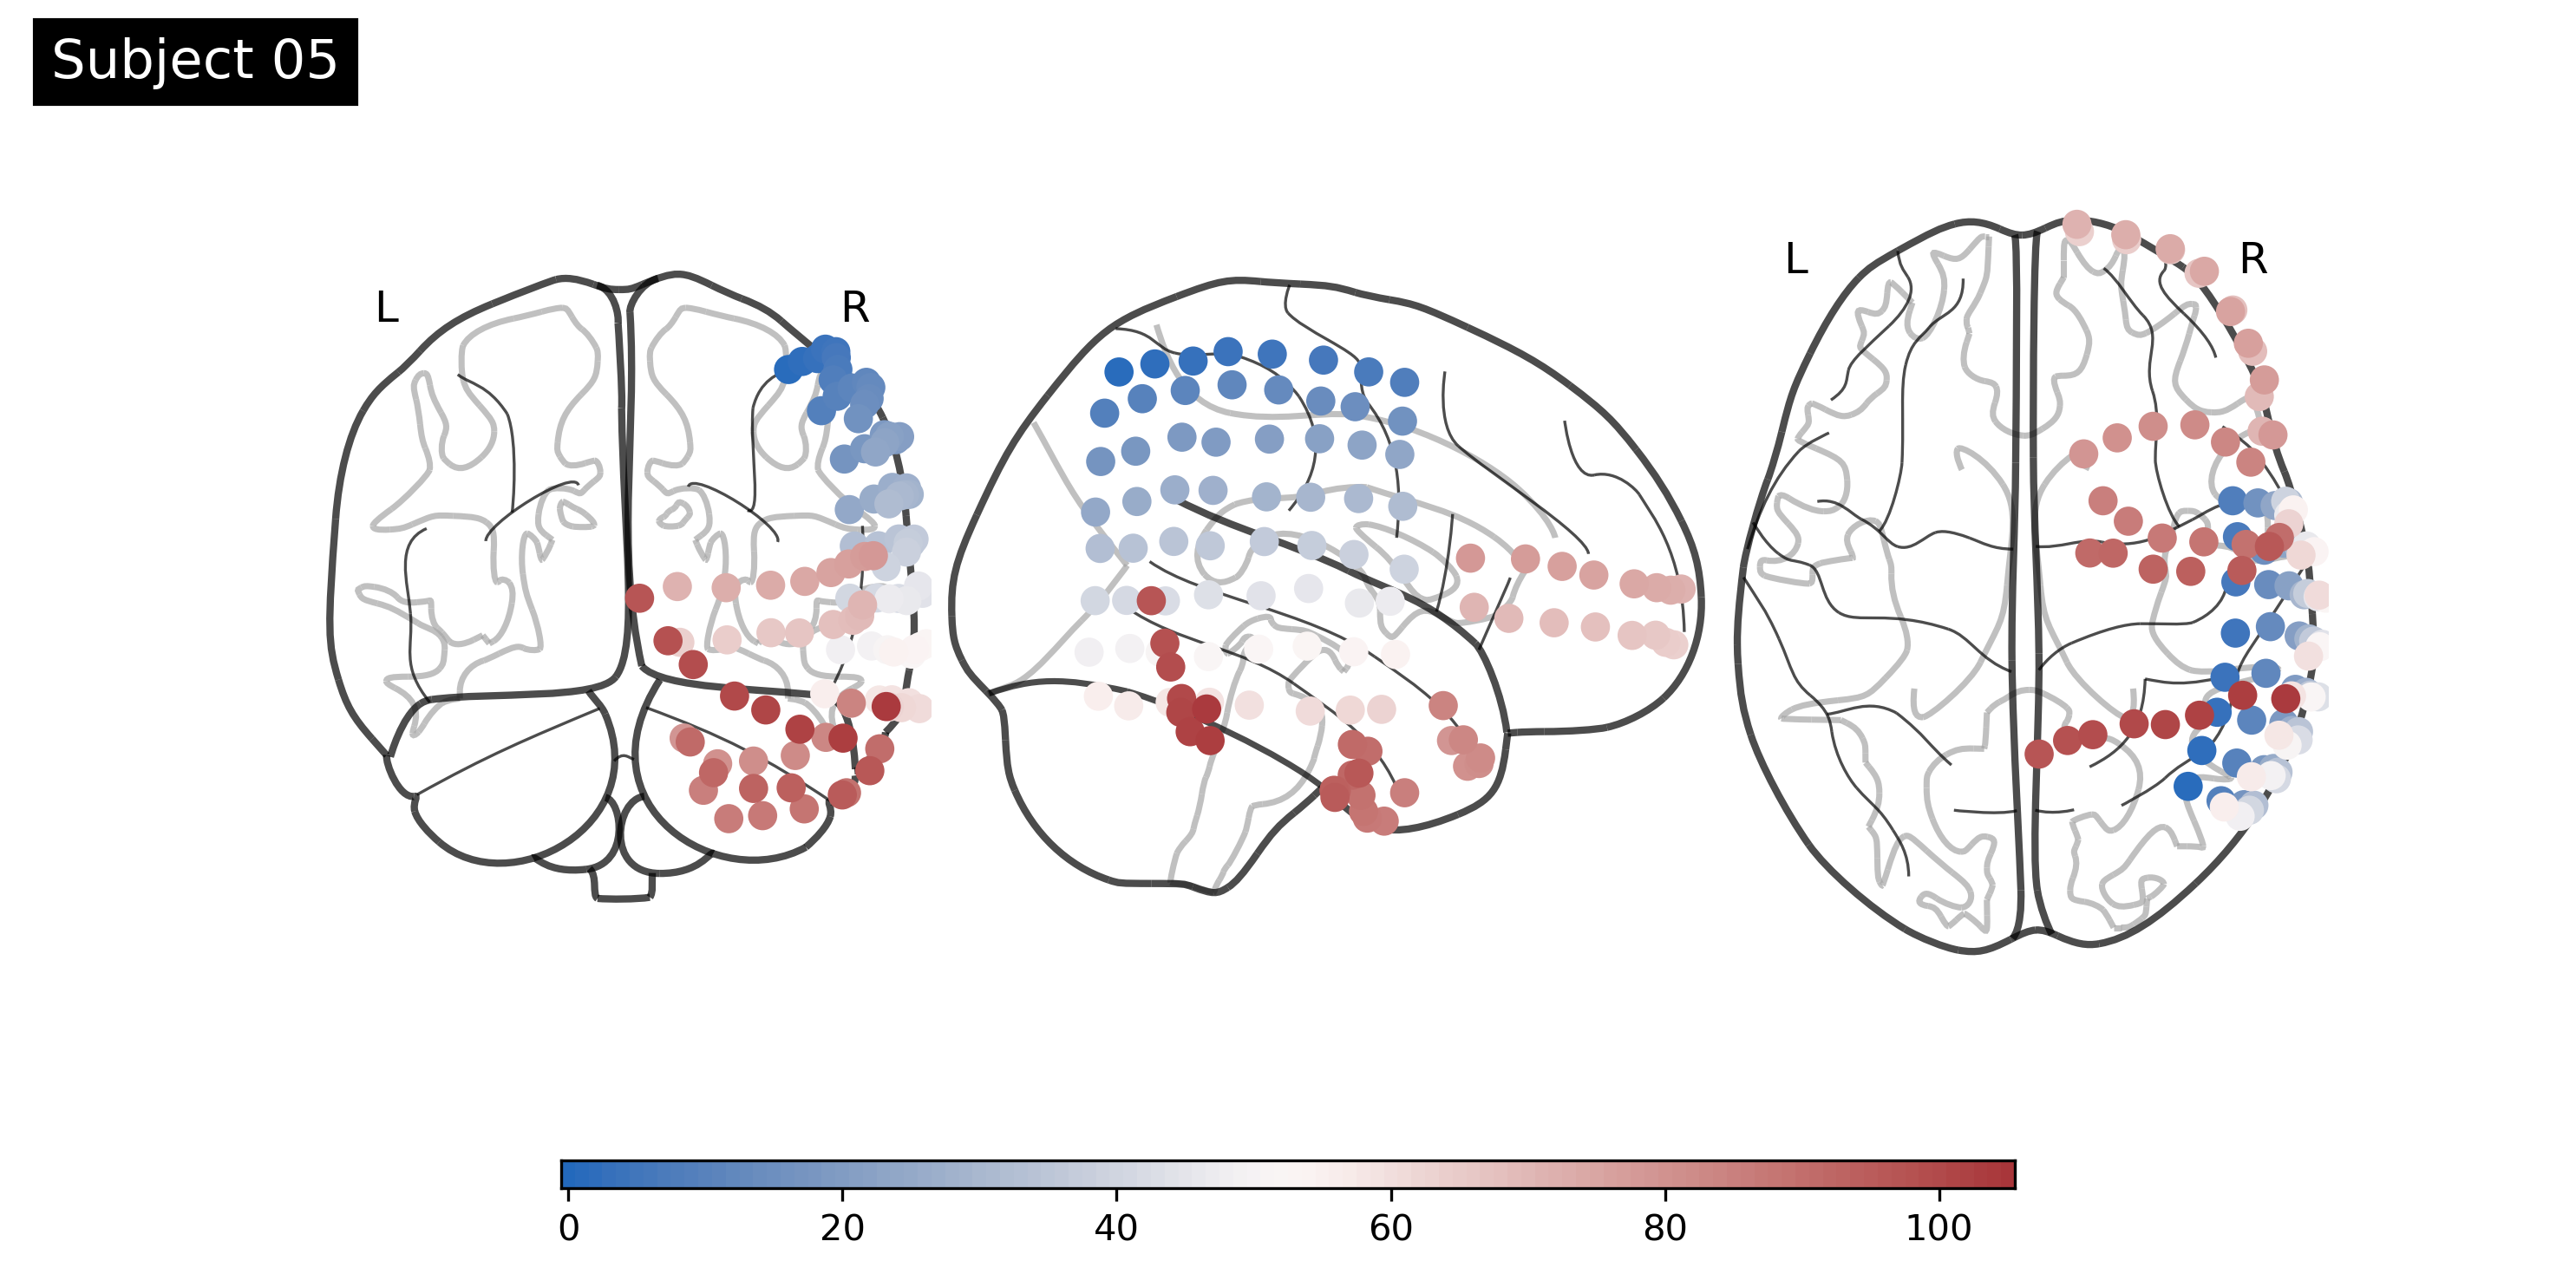

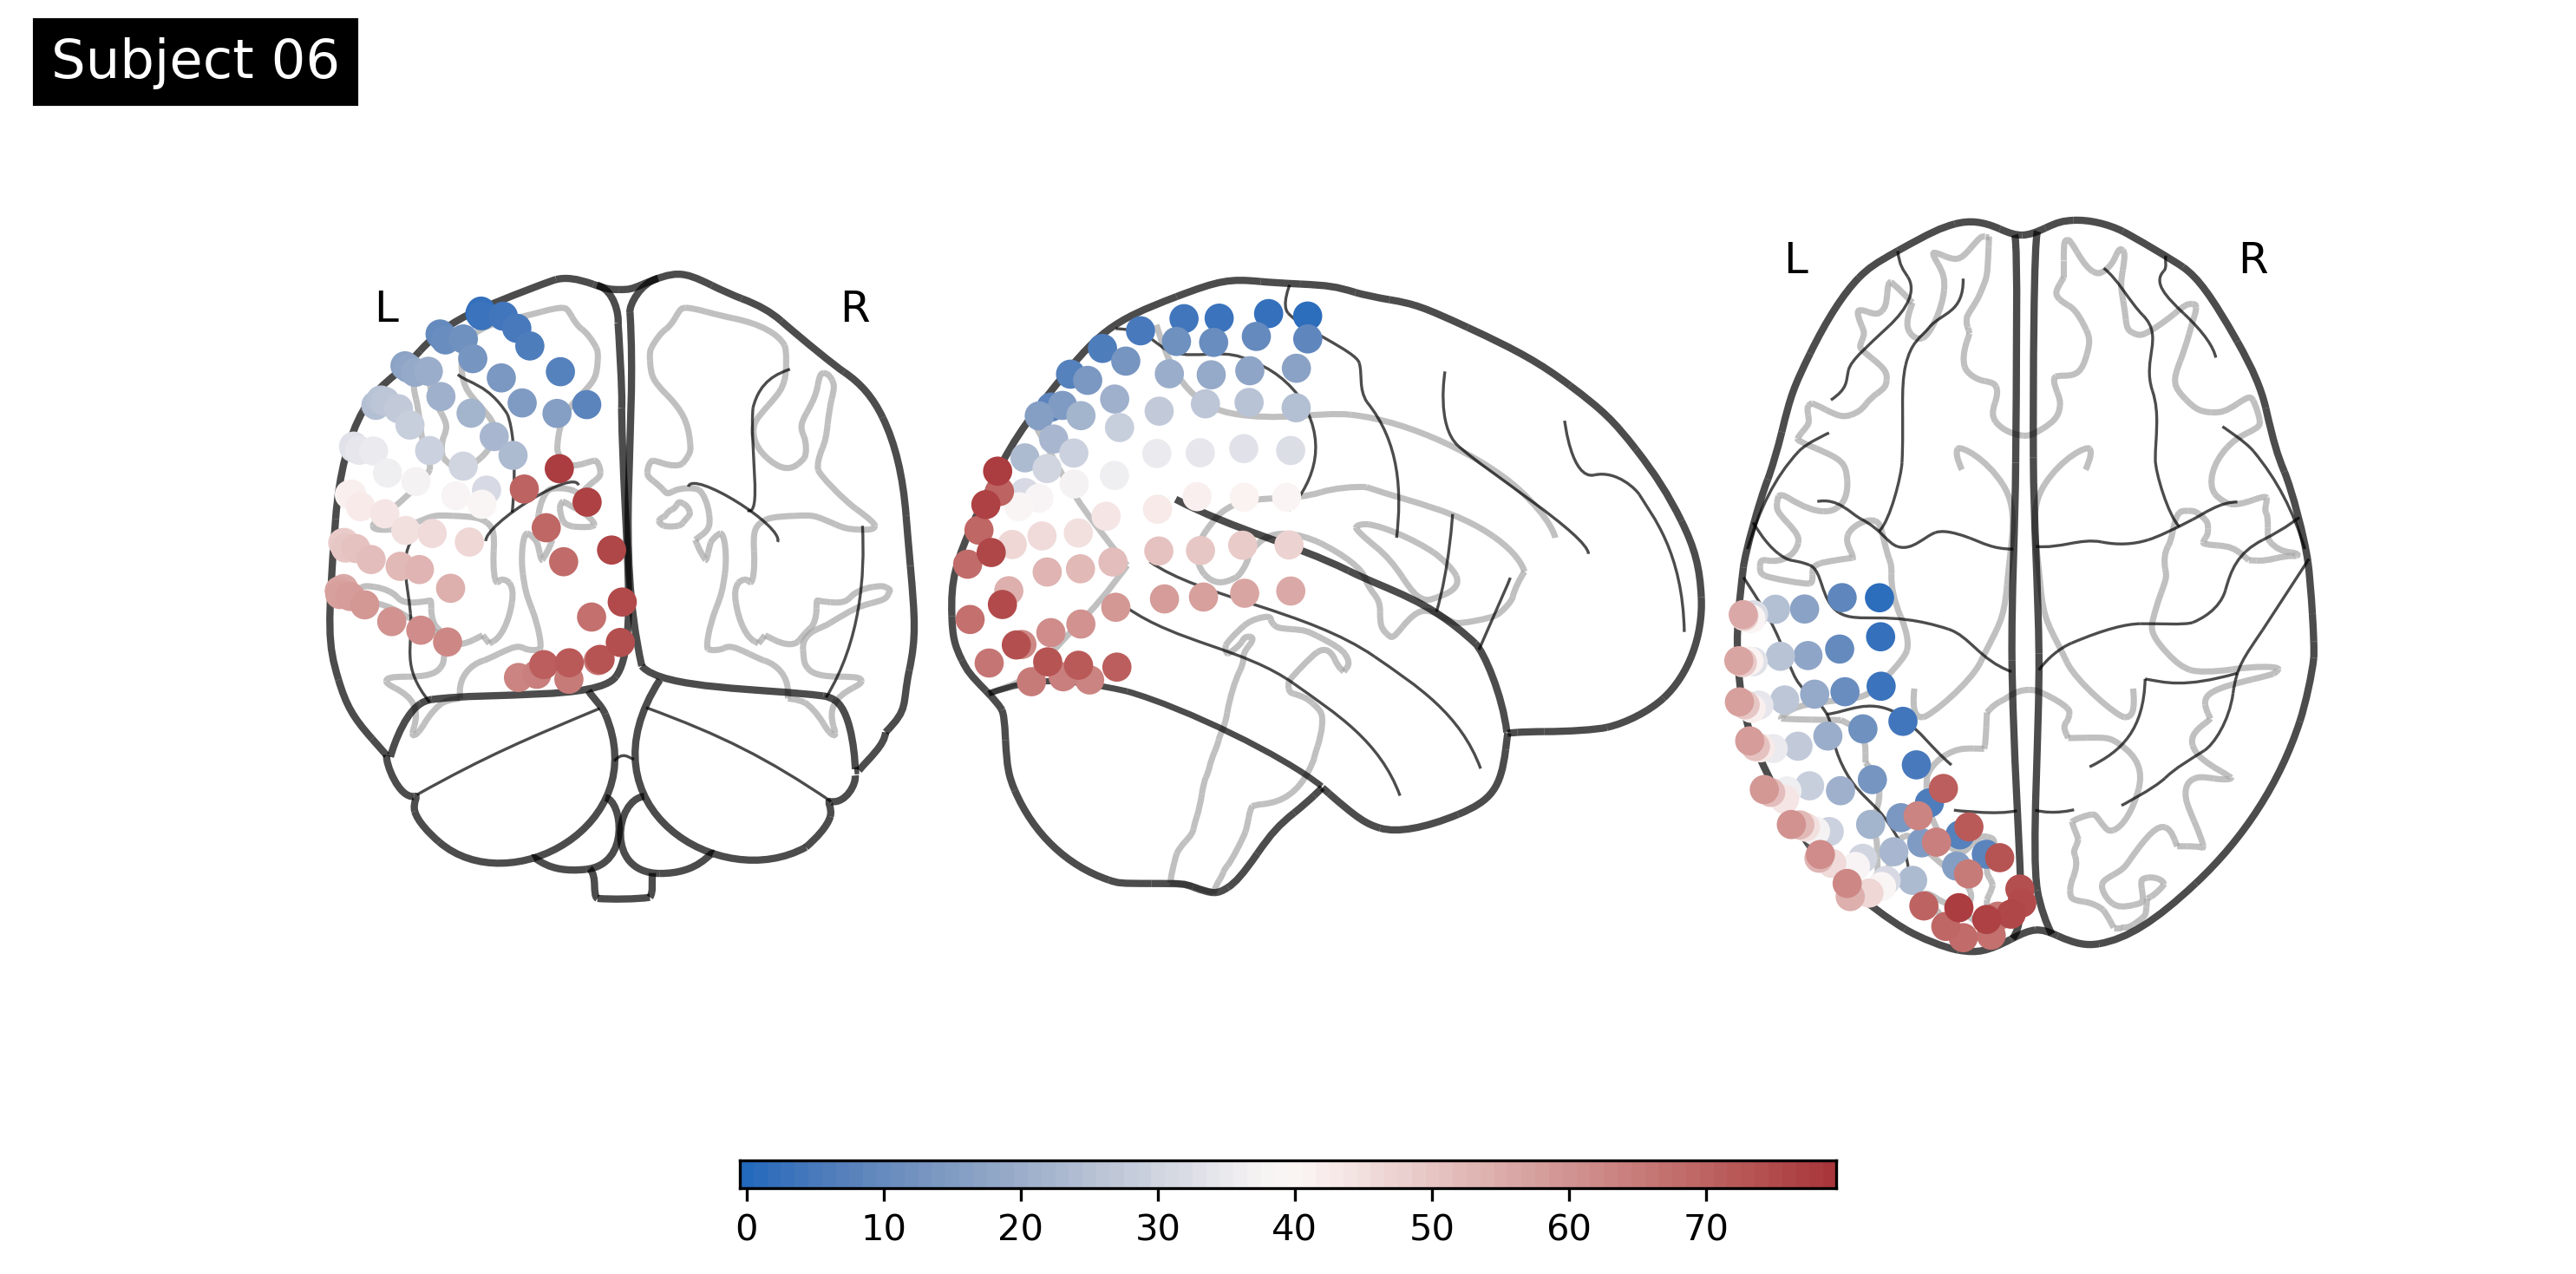

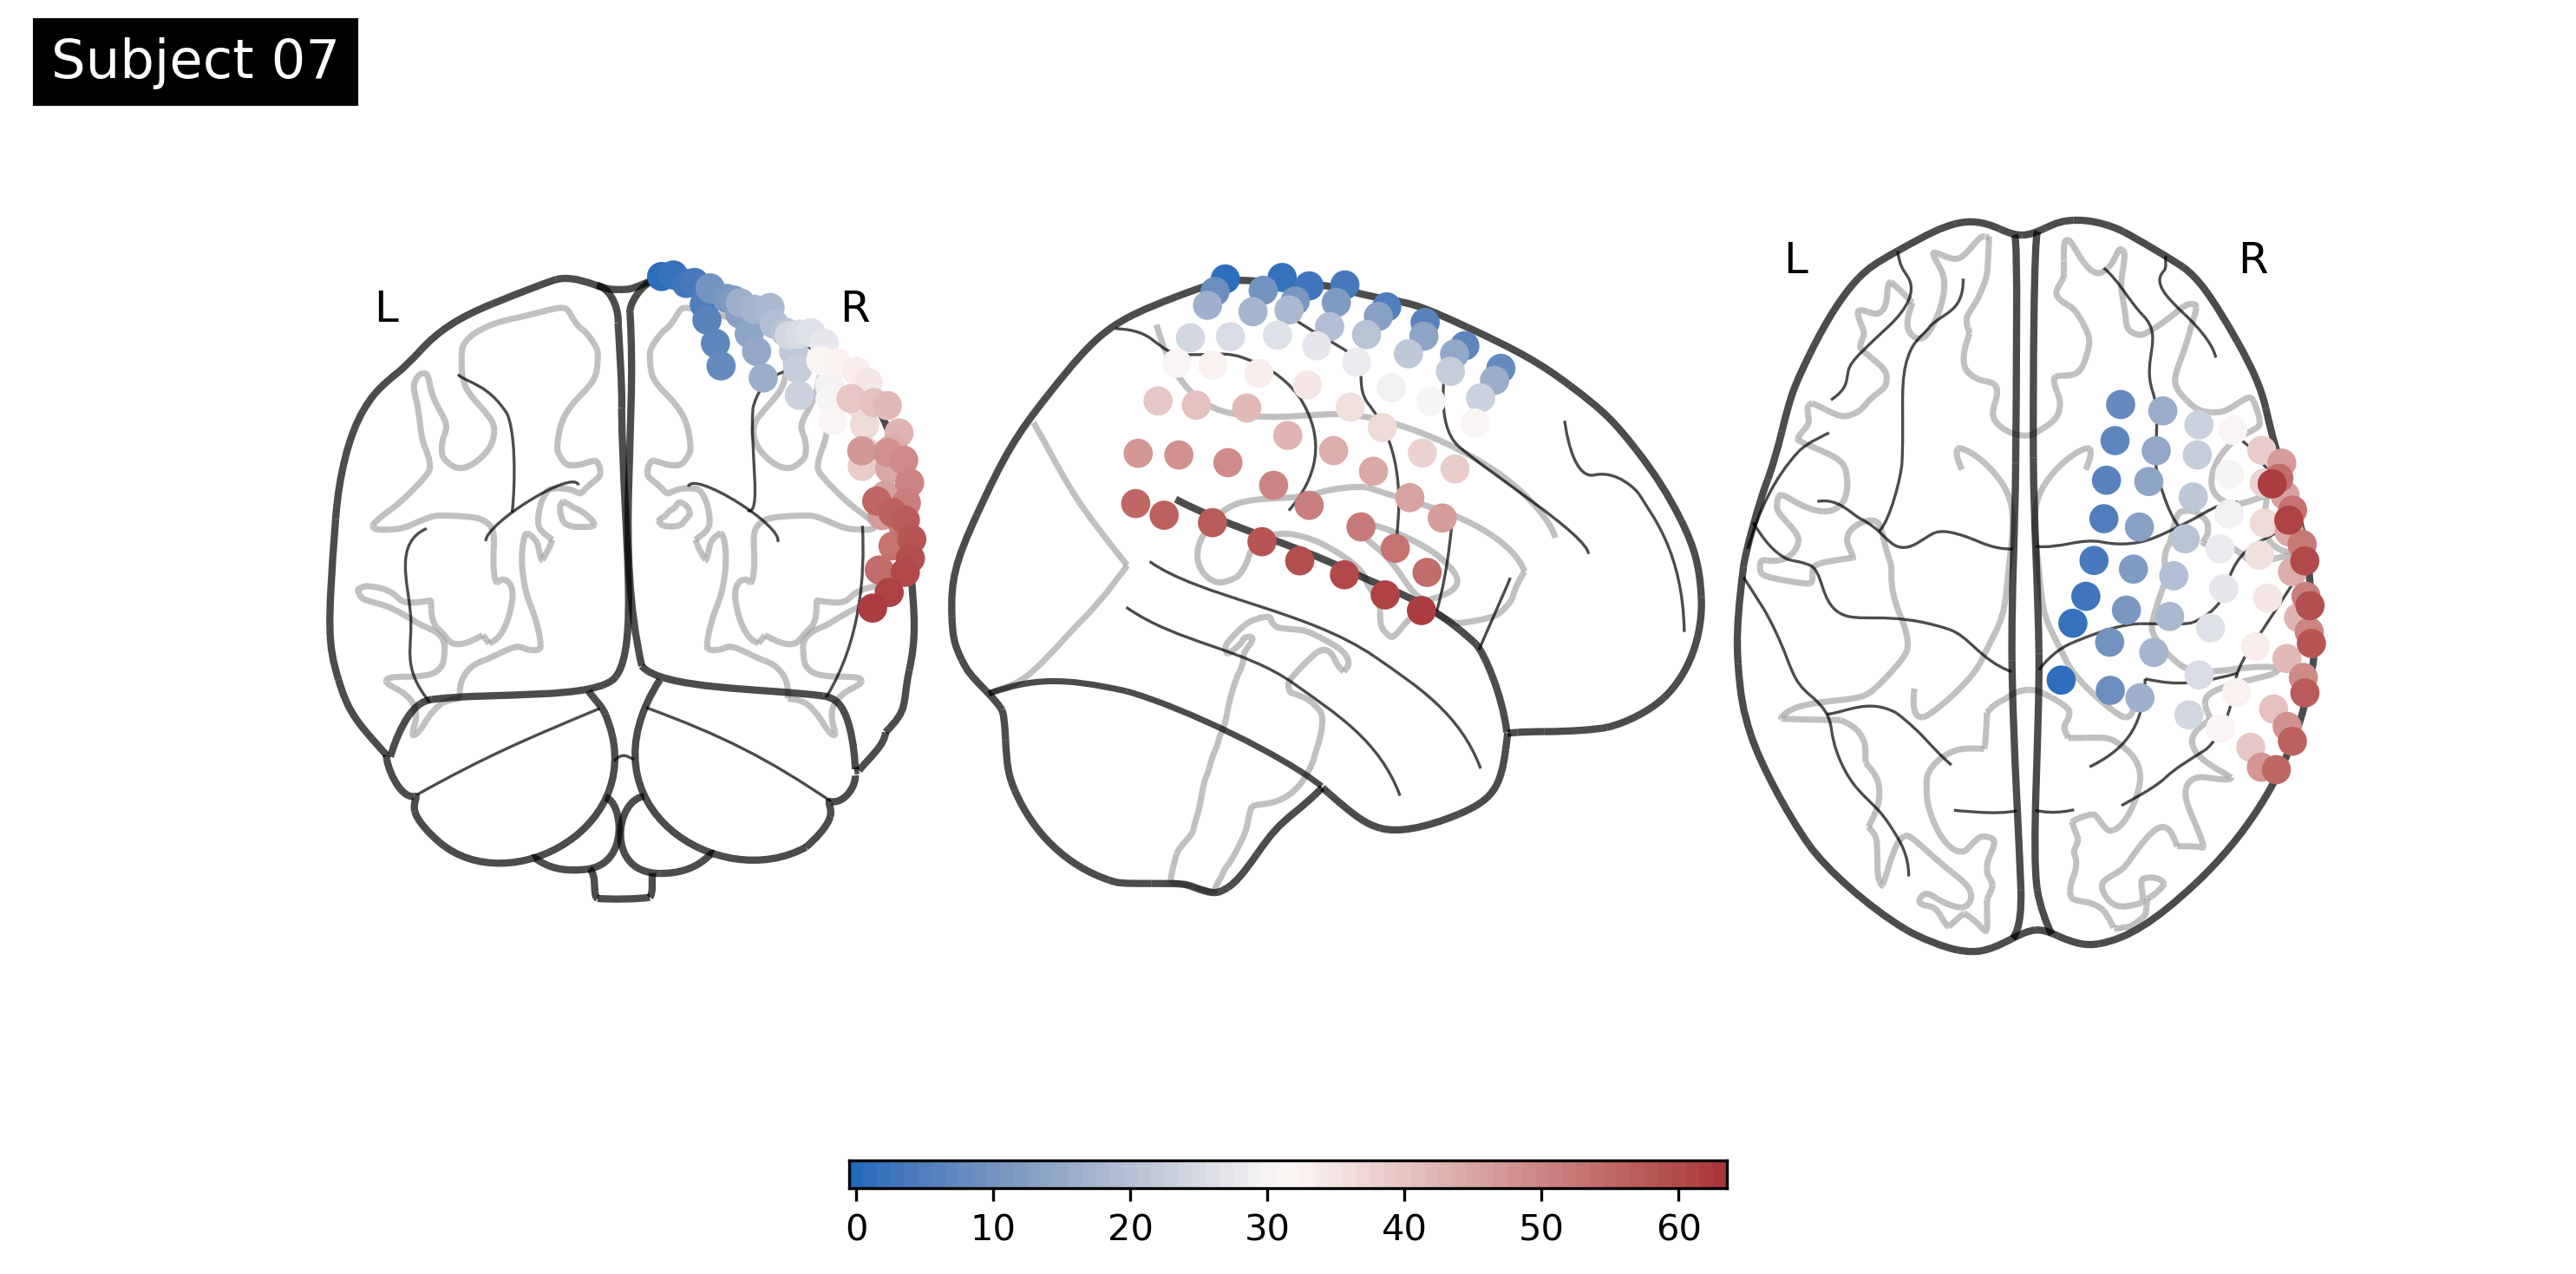

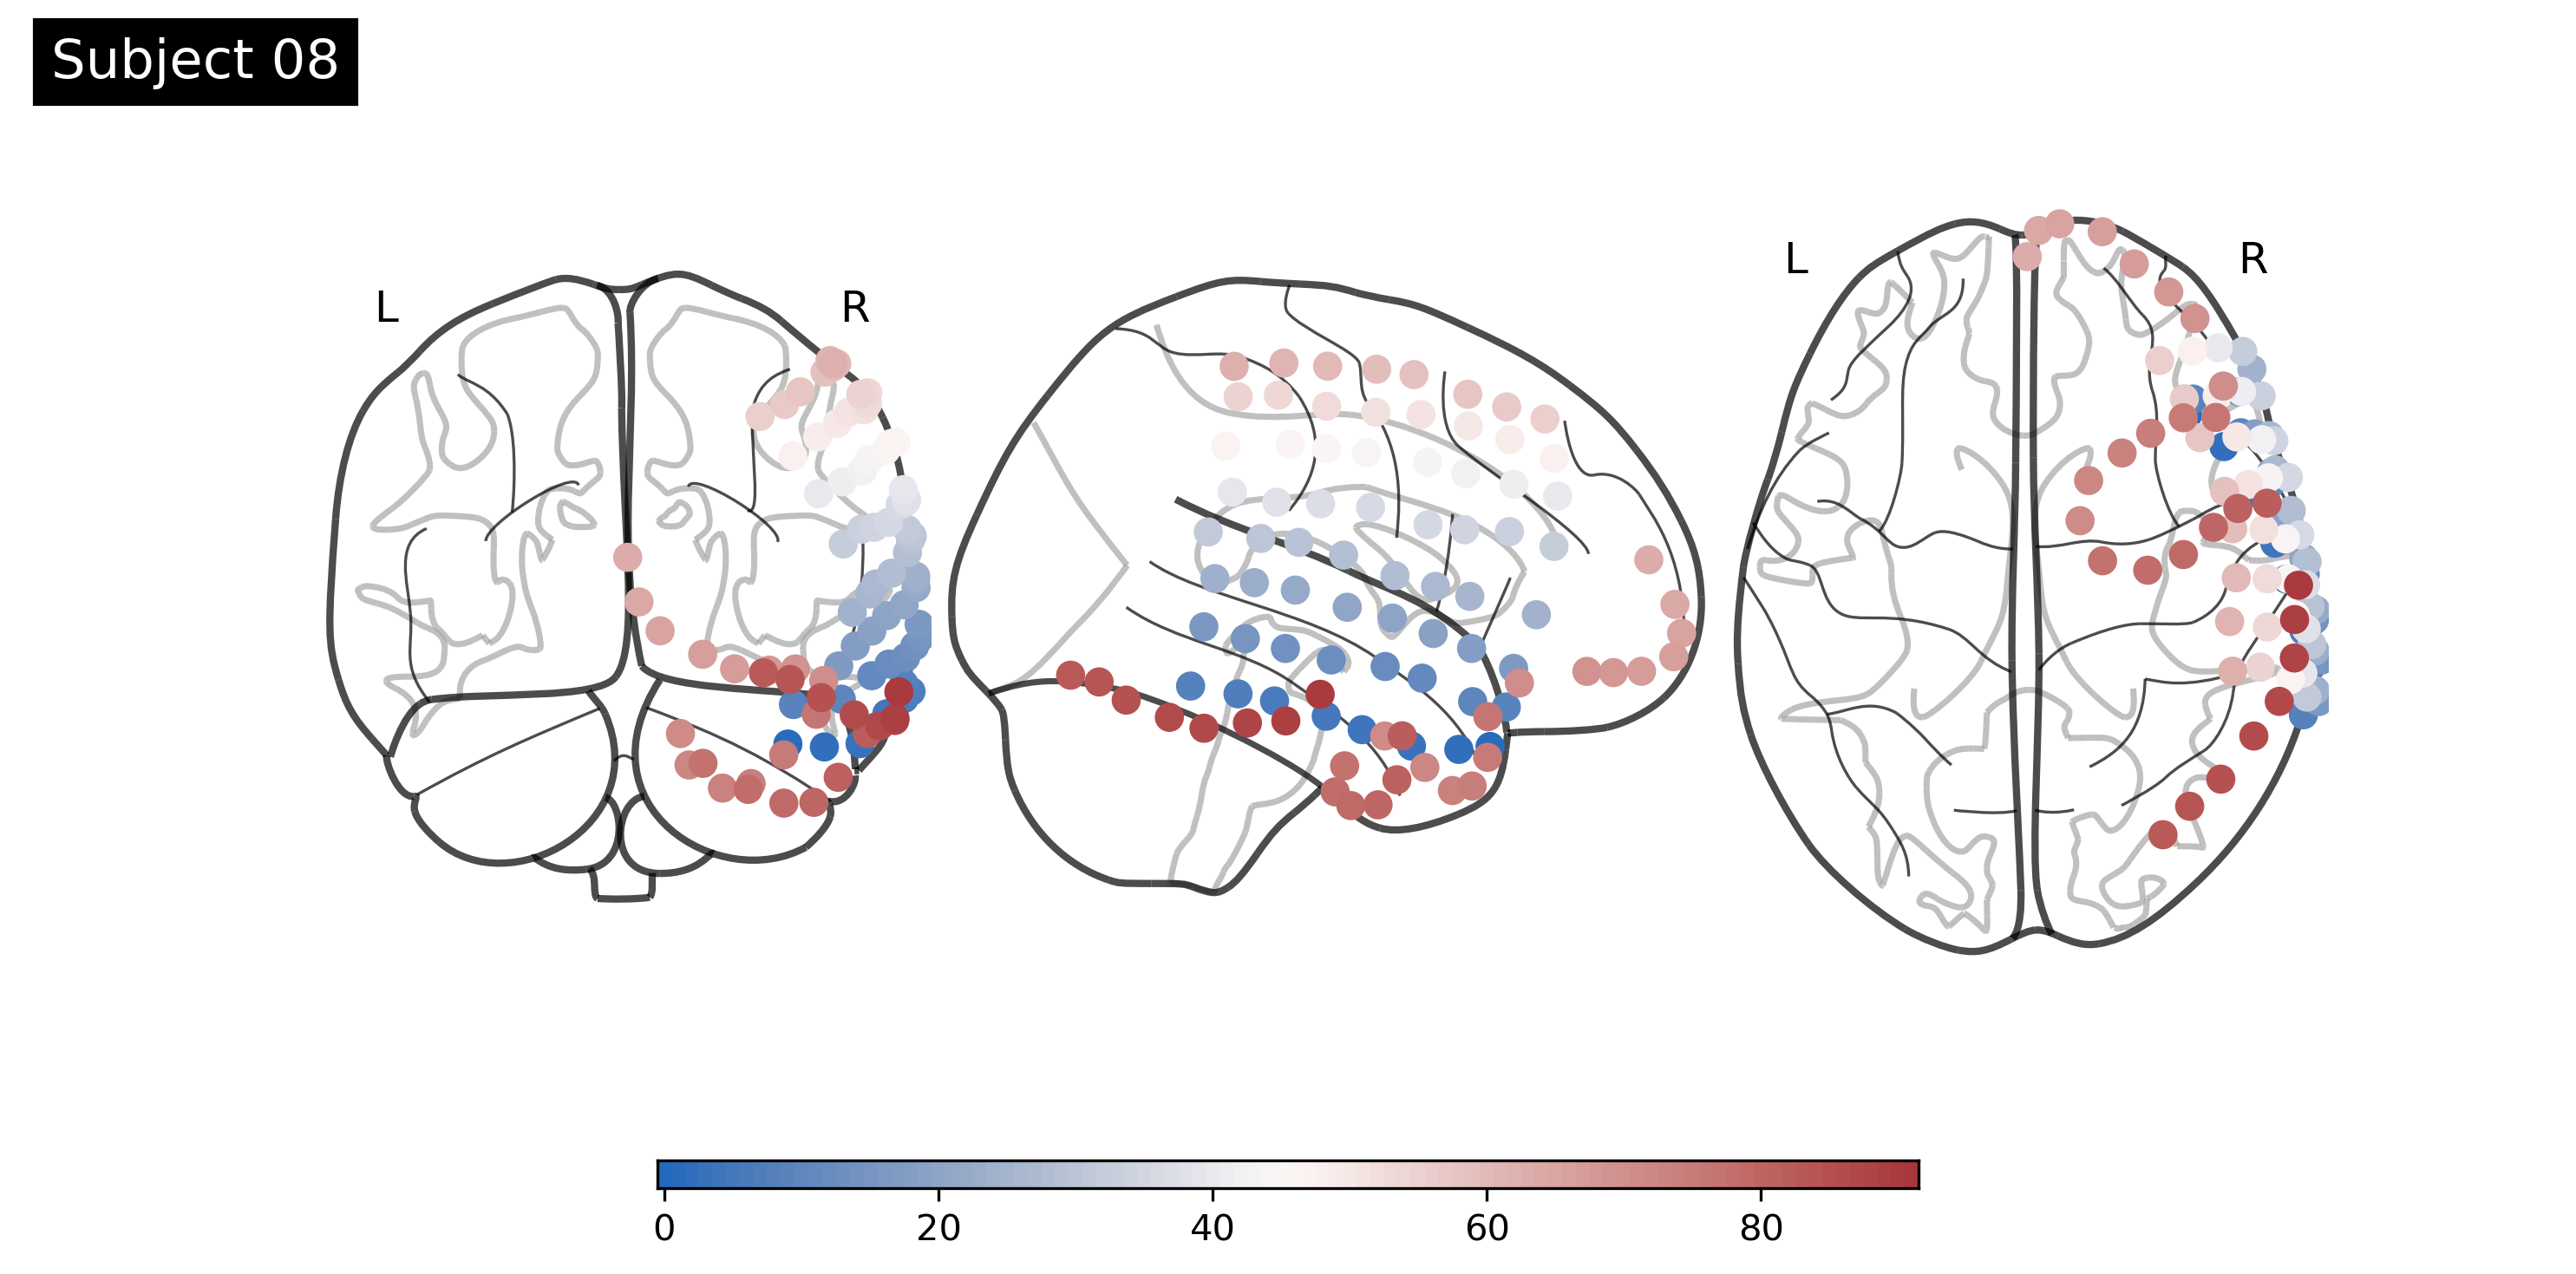

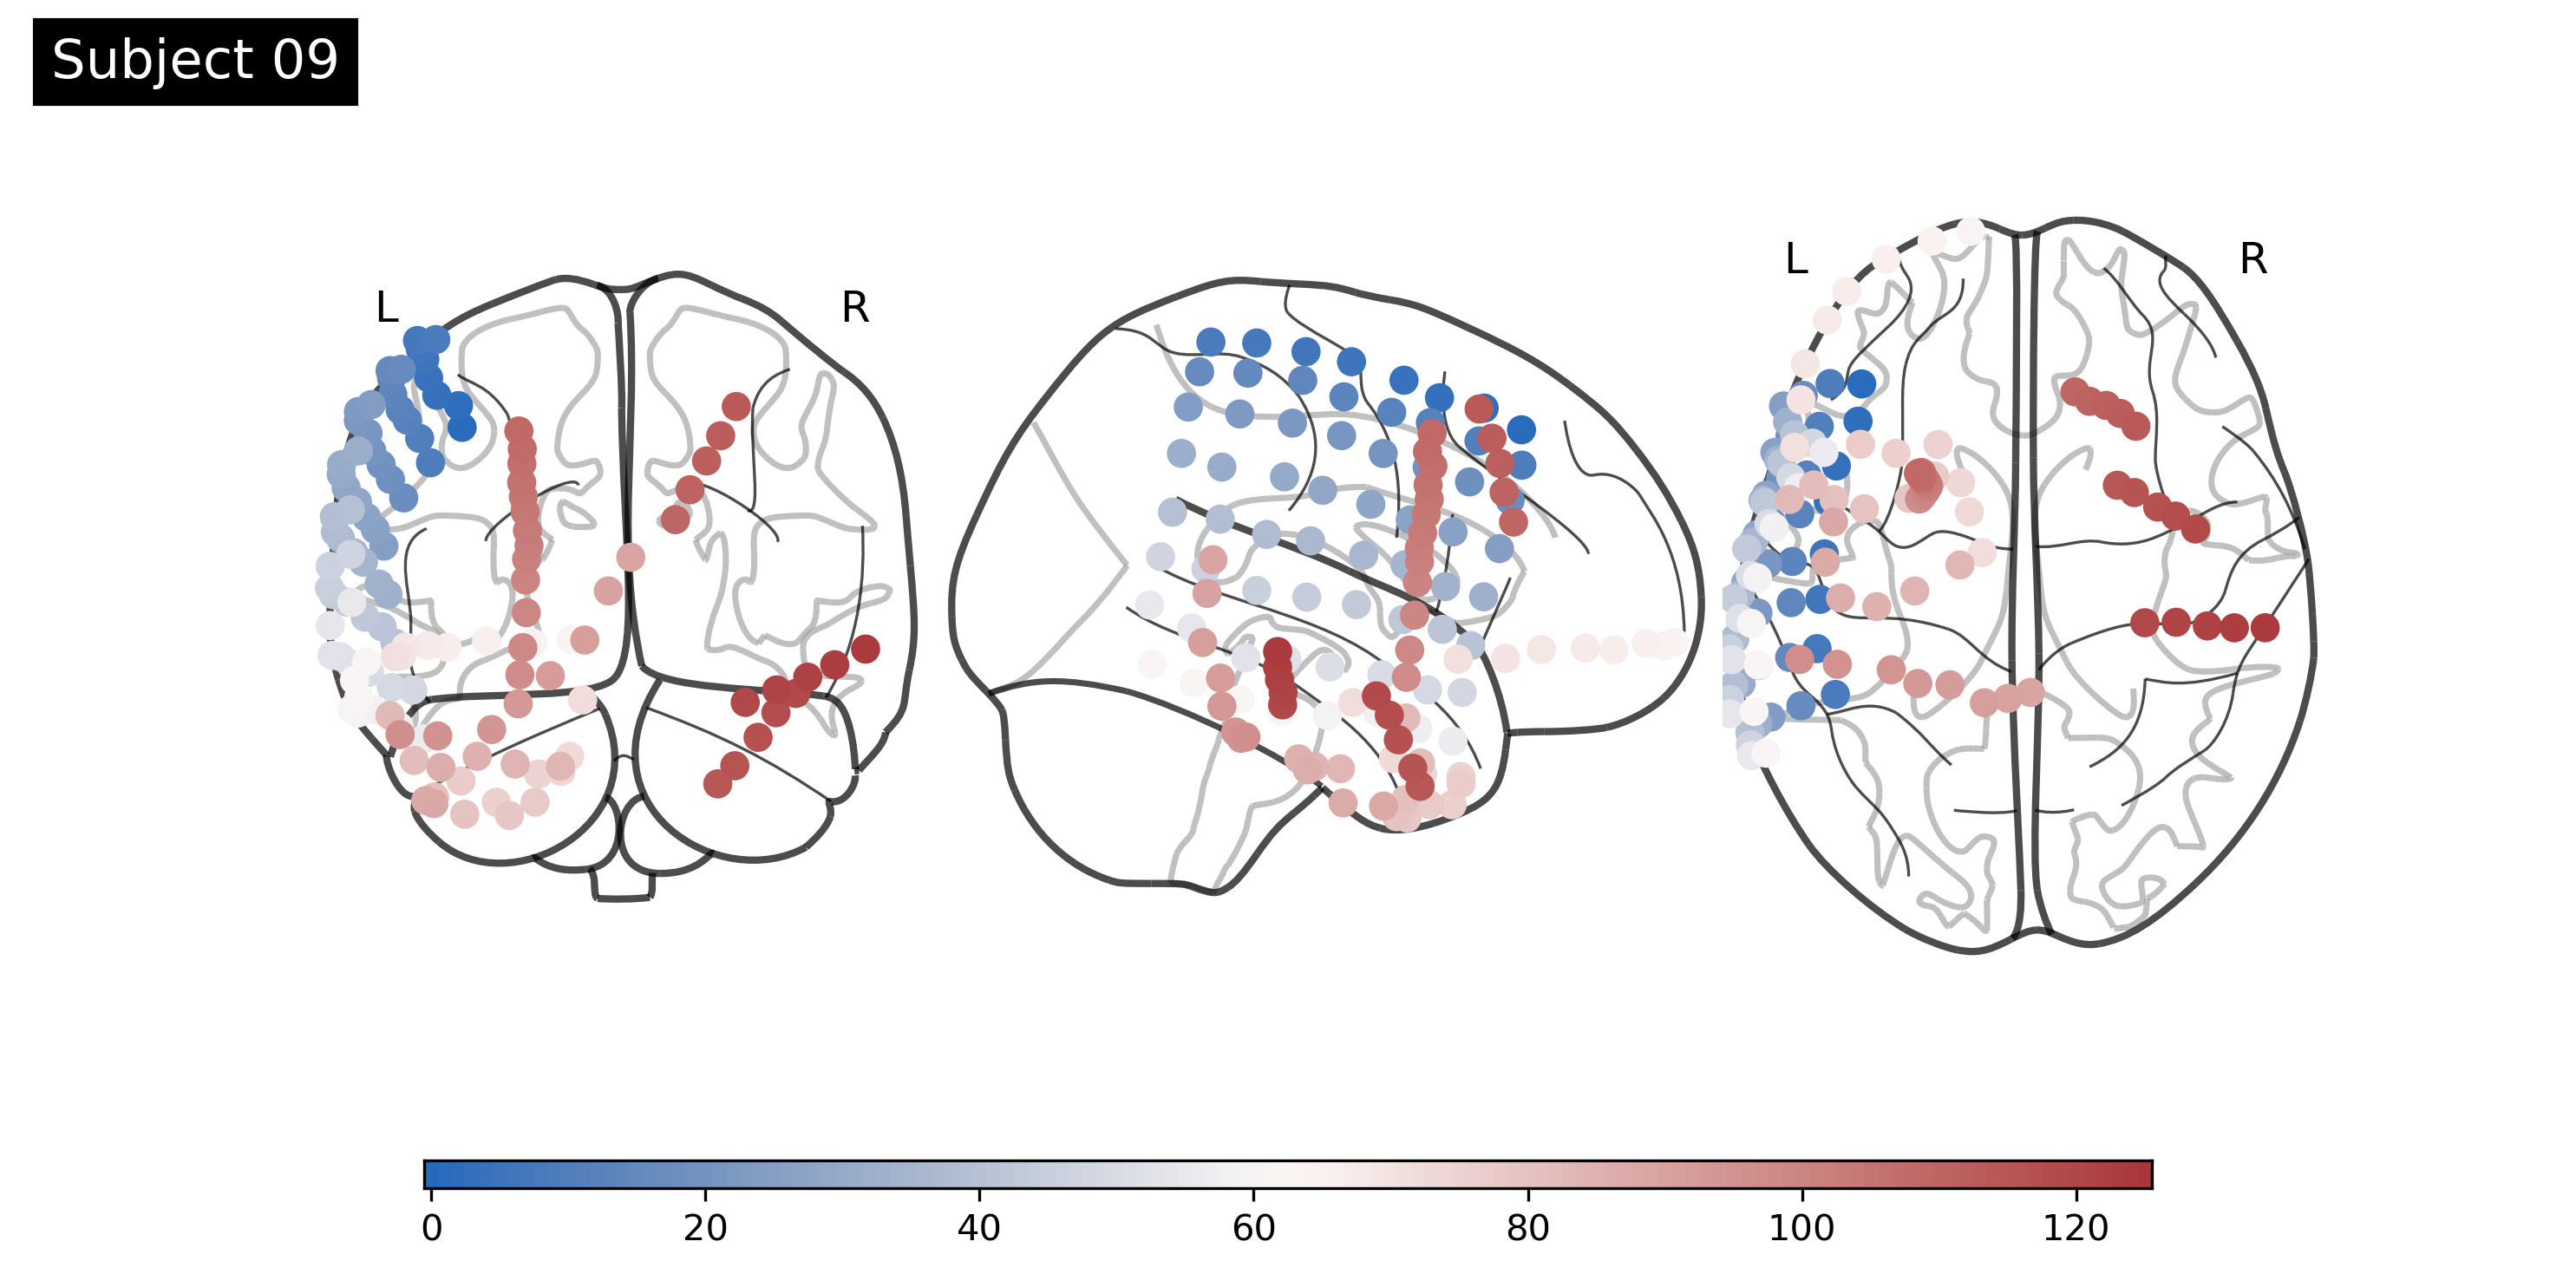

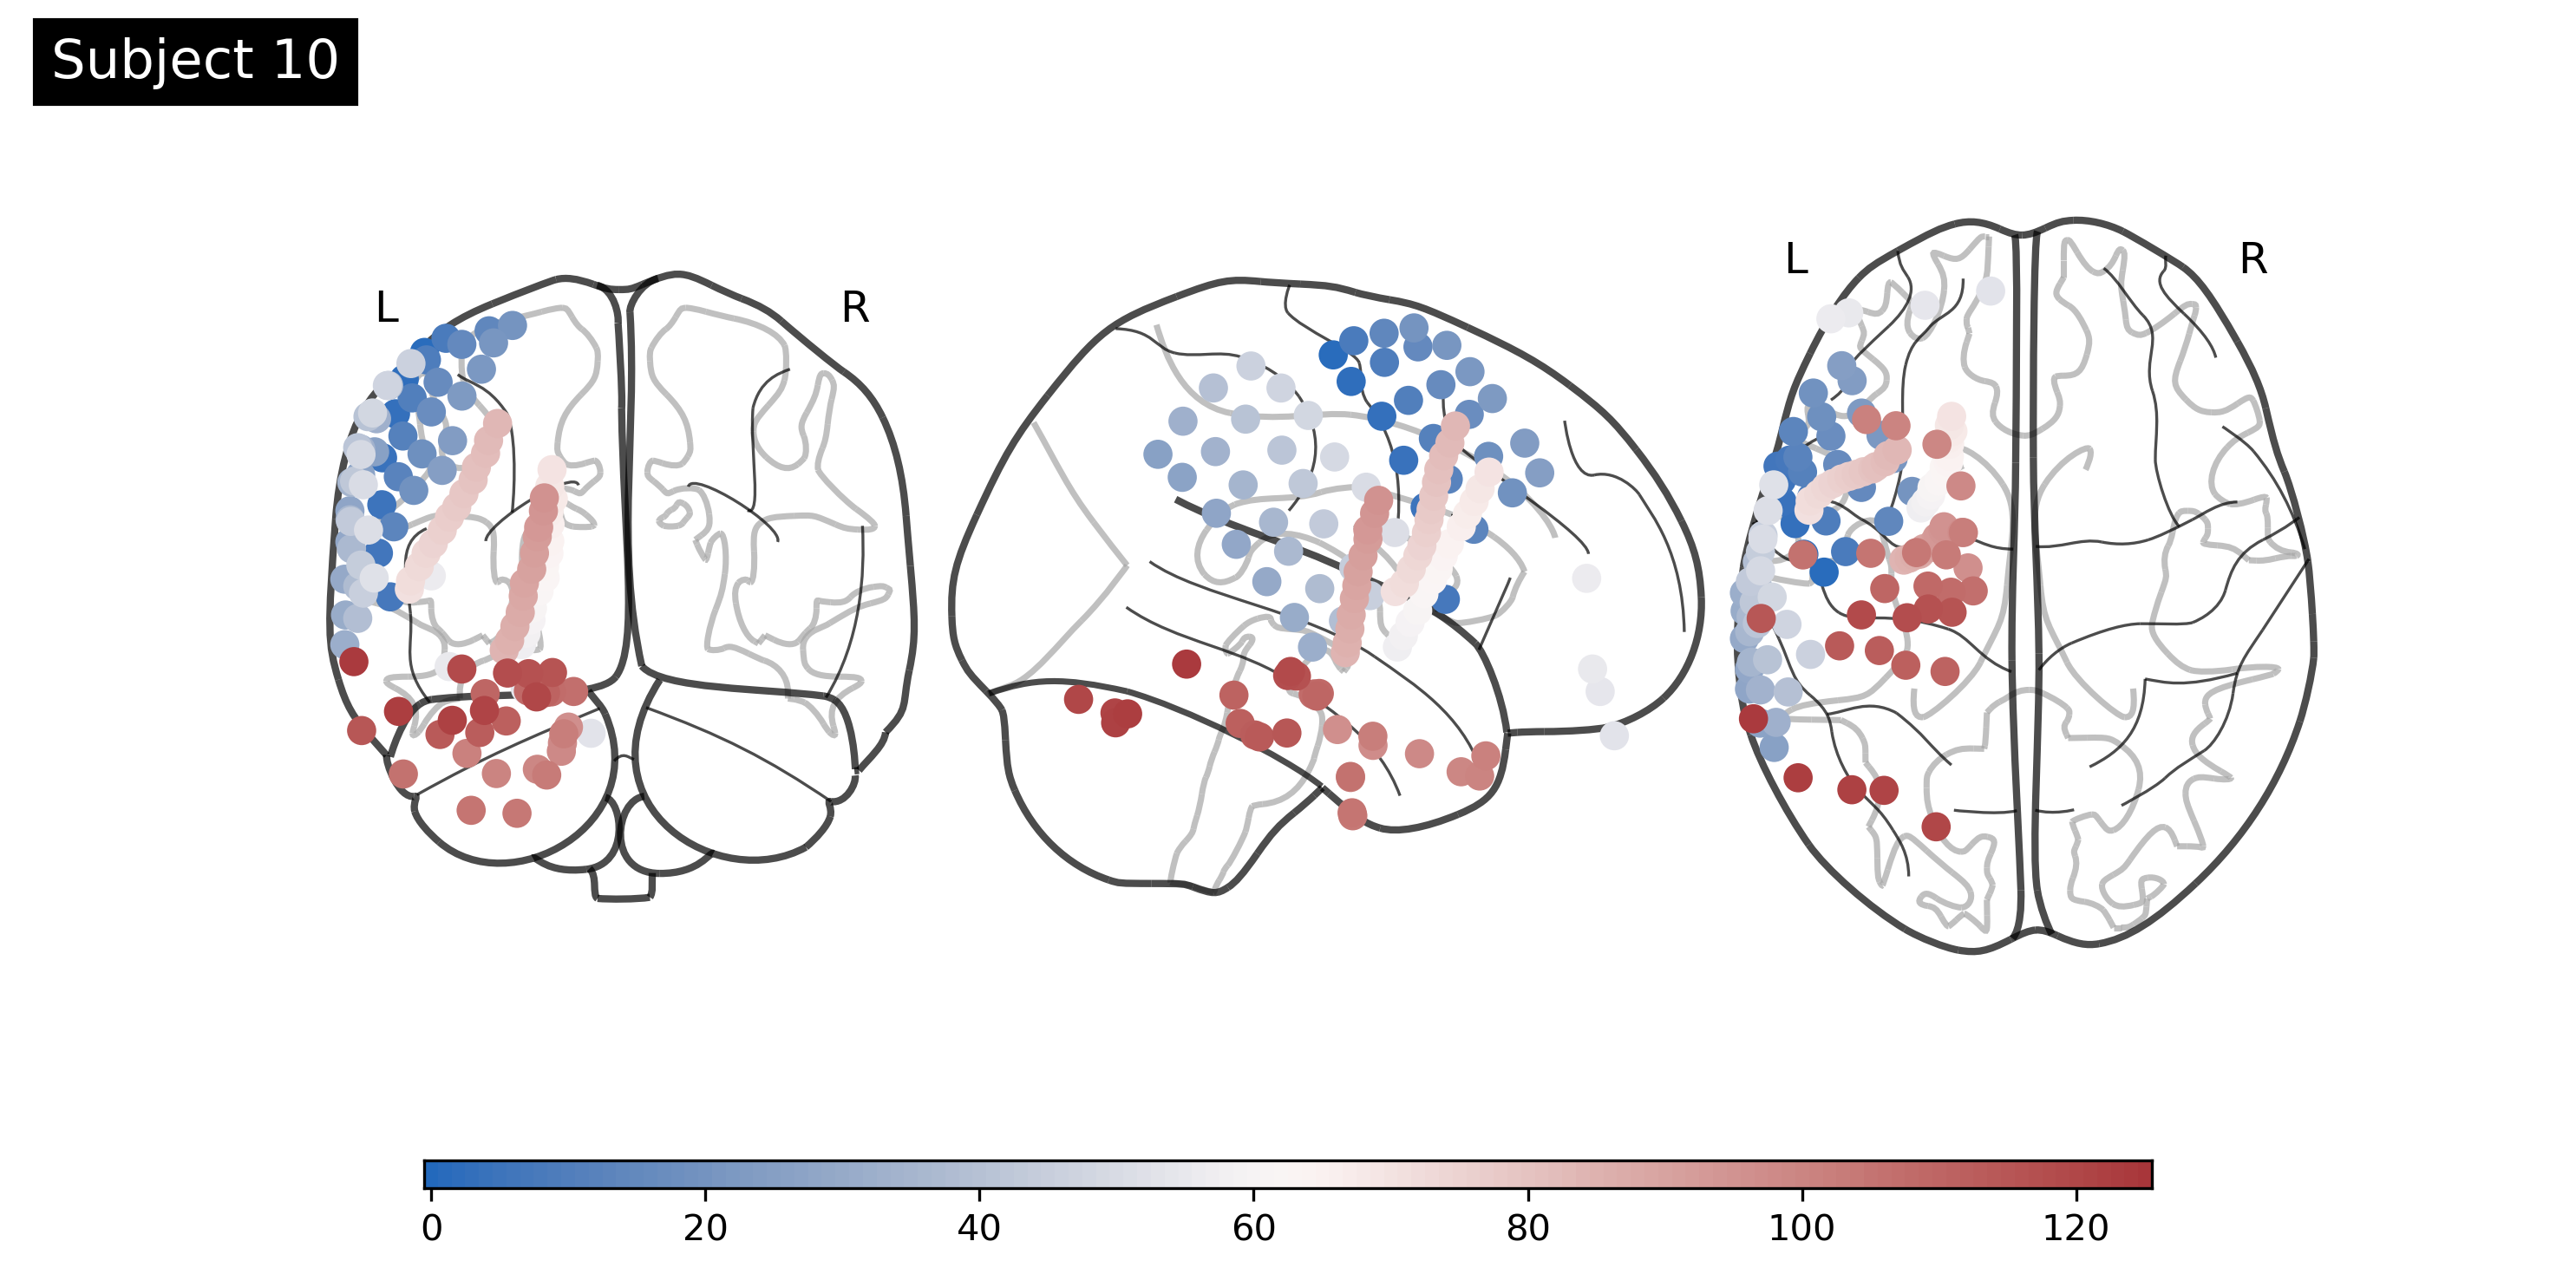

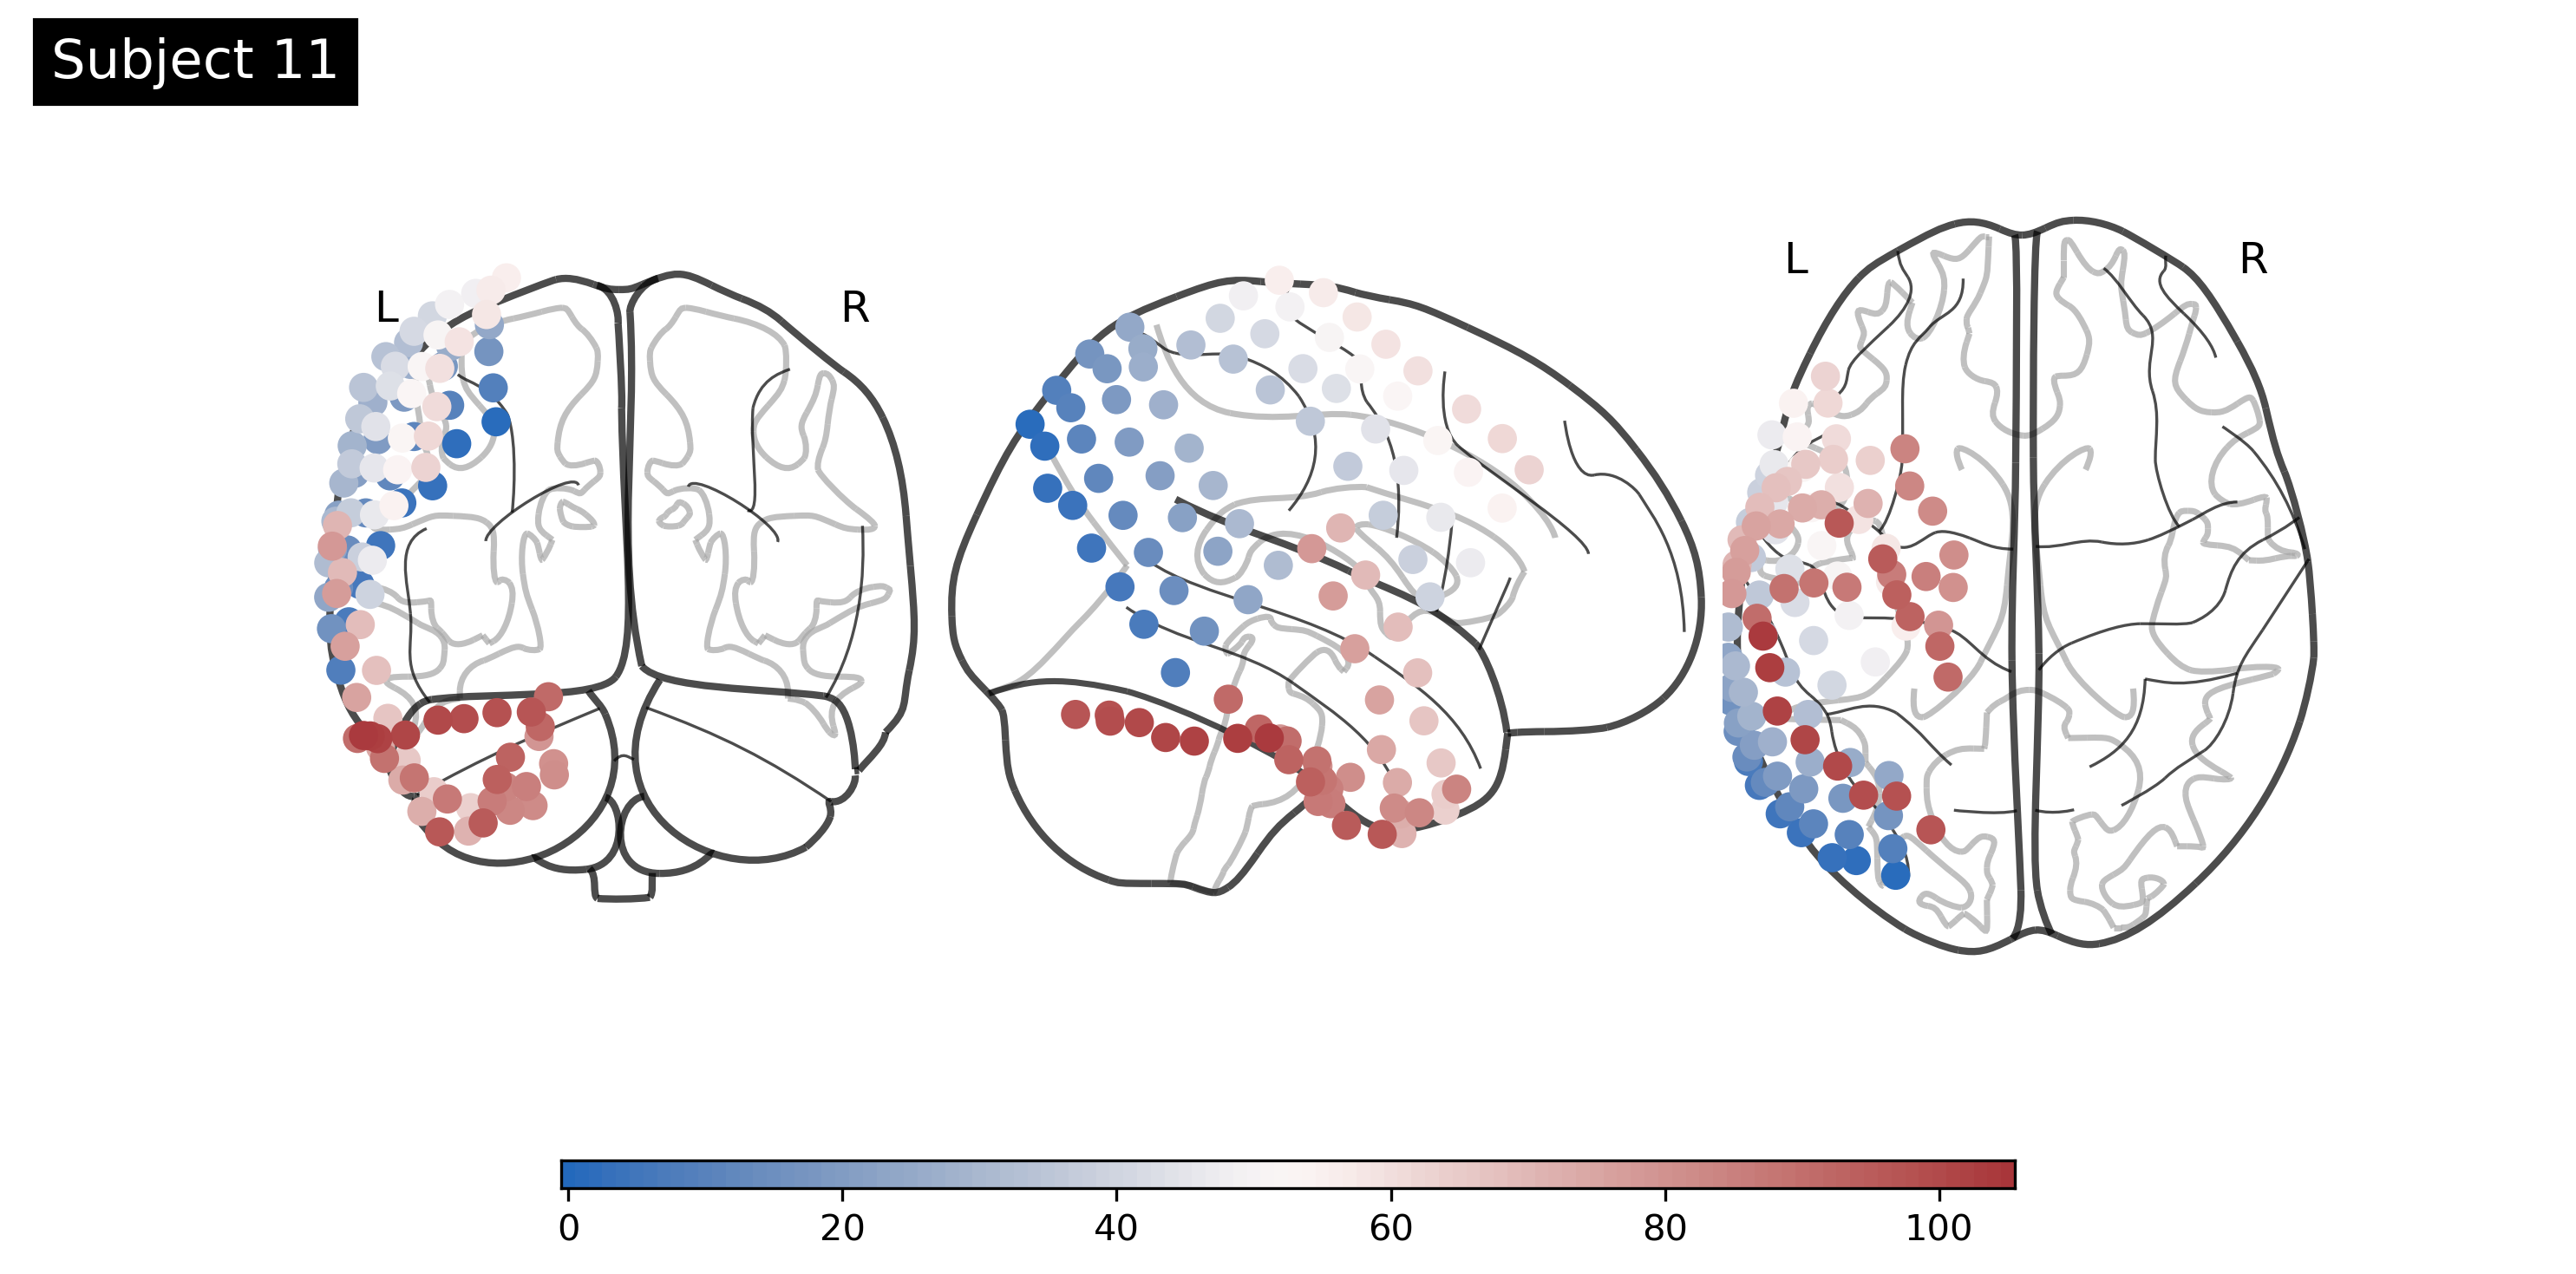

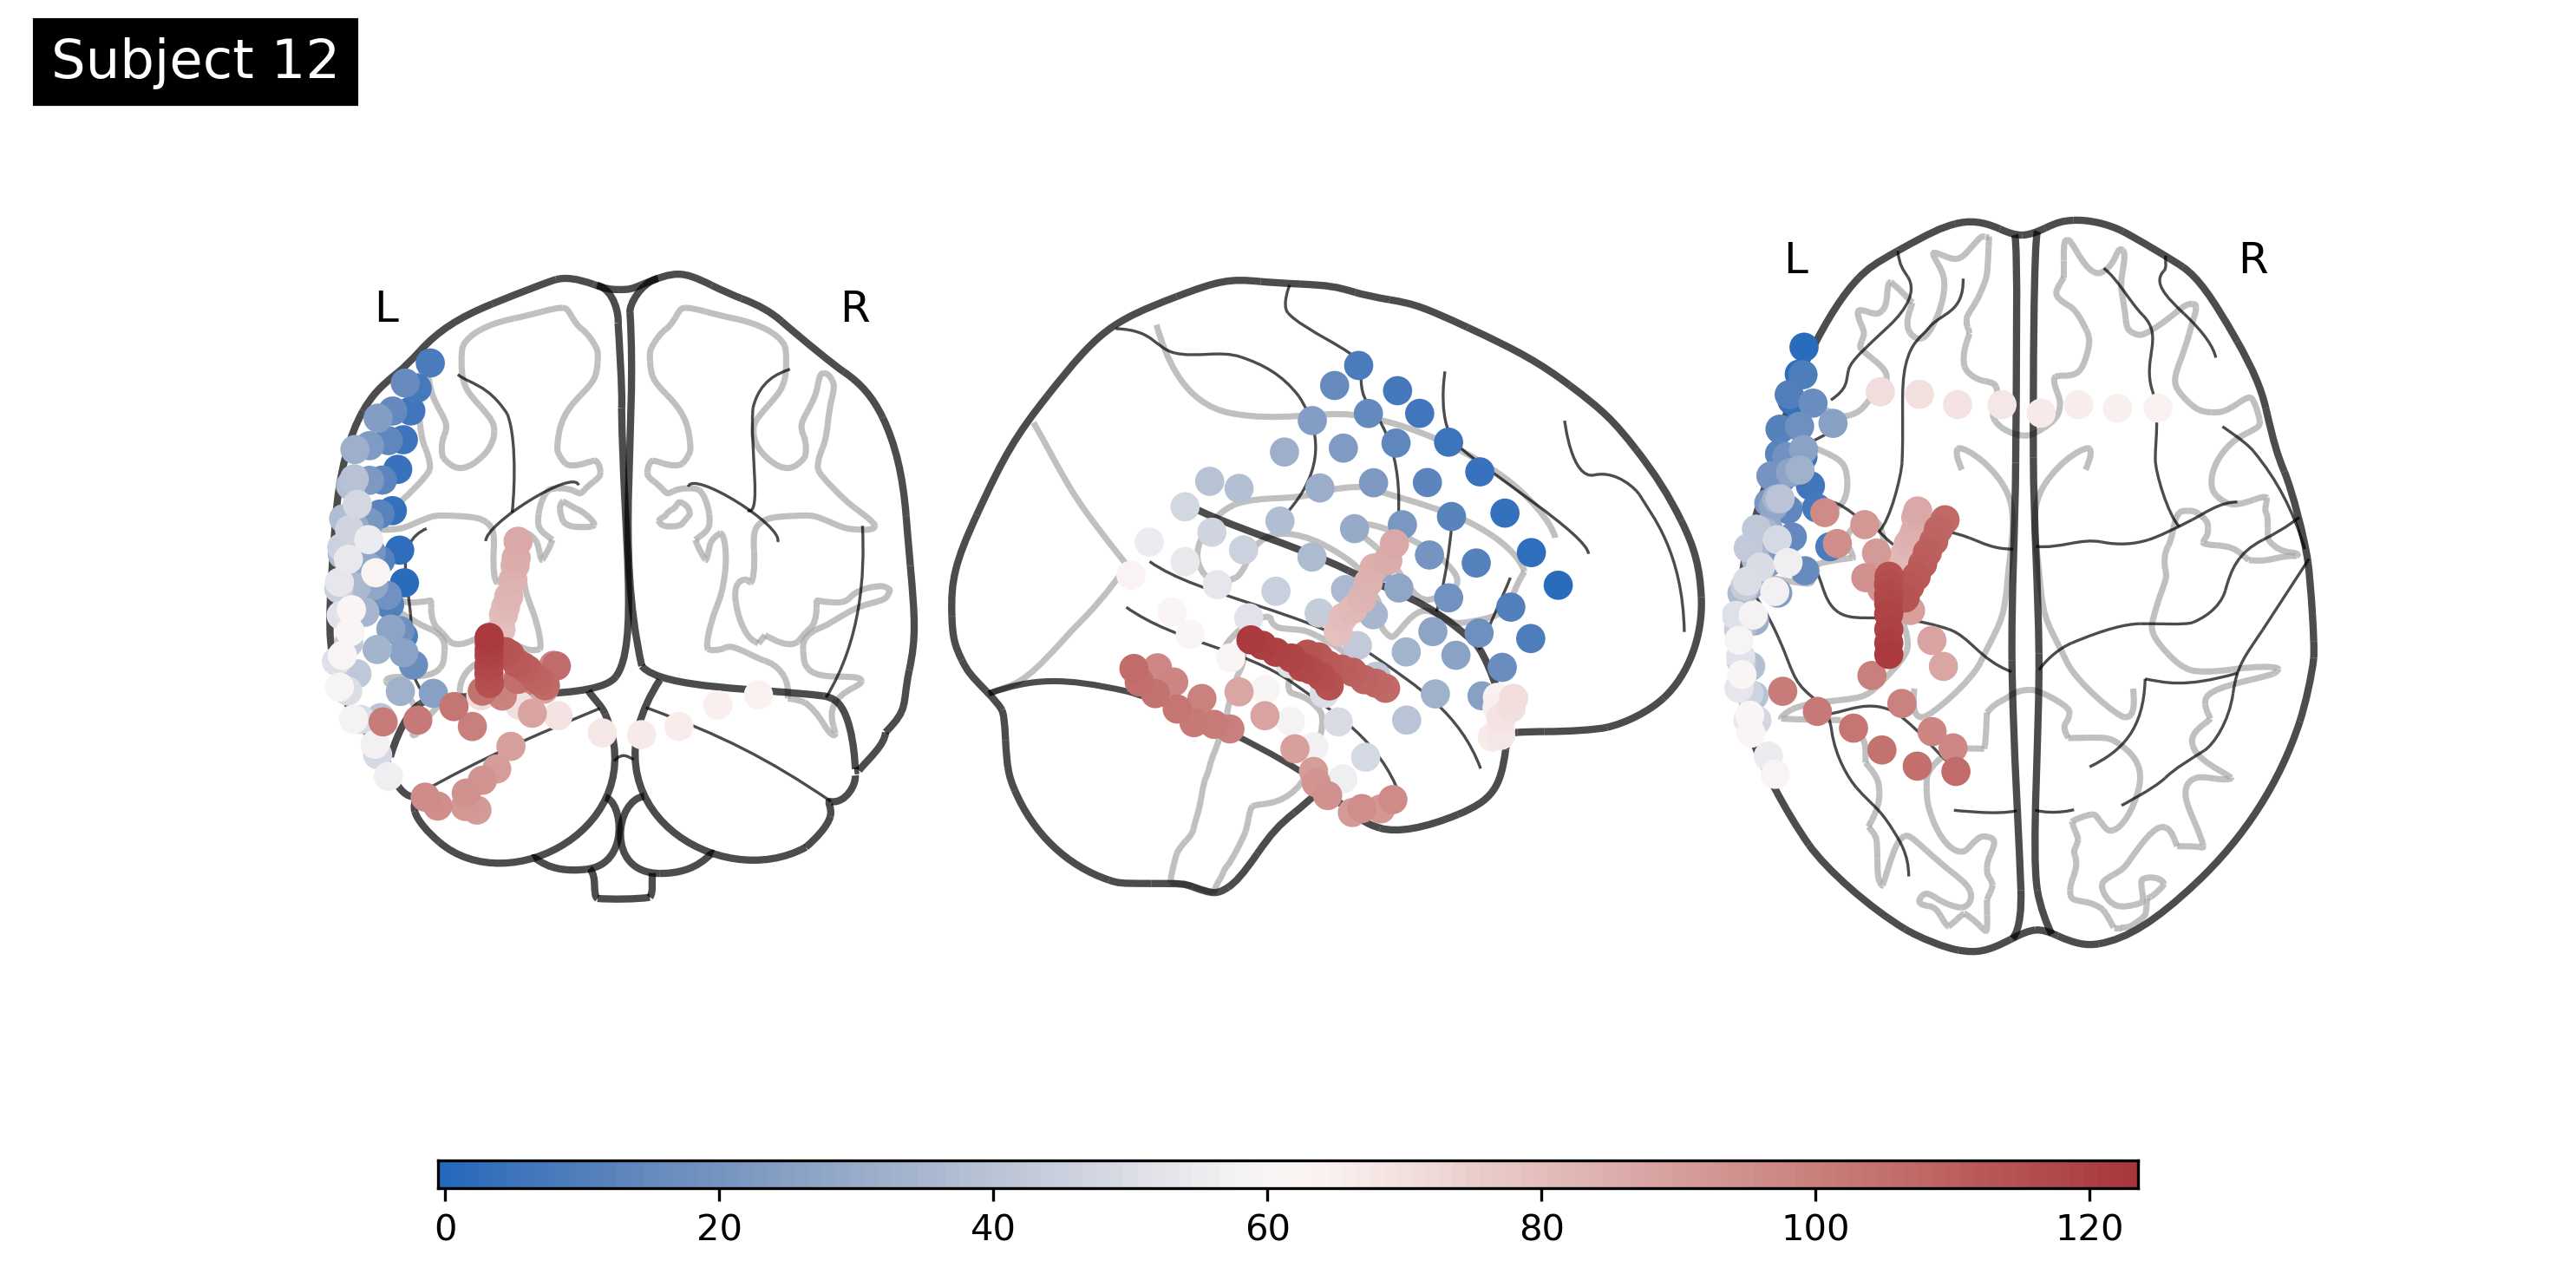

In [7]:
from extract_utils import mni_2_csv, plot_electrodes

for item in filedict.keys():
    file = filedict[item][0]
    coords = mni_2_csv(file, item, sbj_2_session[item], True)
    fig = plot_electrodes(coords, item)
    # save figure for each patient
    fig.savefig(f'Data/electrodePos/ep_sbj_{item}')